# Modelling Wind Speed and Direction Distribution using Gaussain Mixture Modles (OEN method)

OEN Method: Harris, Cook
The parent wind speed distribution: Why Weibull?
http://www.sciencedirect.com/science/article/pii/S0167610514001056

Gaussian Mixture Modles, 
http://scikit-learn.org/stable/modules/mixture.html

# 1. Set up

## 1.1 Environment

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from __future__ import division
from import_file import *
load_libs()

In [2]:
## Input params used outside this notebook
# params = {'gaussian_number': 4, 'file_path': "./data/NCDC/uk/weybourne/dat.txt"}
dictget = lambda d, *k: [d[i] for i in k]
if 'params' in globals():
    input_file_path, NUMBER_OF_GAUSSIAN, FIT_METHOD, KDE_GRIDSEARCH = dictget(params, 'input_file_path', 
                                                                              'gaussian_number', 
                                                                              'fit_method', 'kde_gridsearch')

## 1.2 Read Data

In [3]:
# ipath= './data/NCDC/uk/boscombe_down/dat.txt' # try 4
# ipath= './data/NCDC/uk/middle_wallop/dat.txt' # good
# ipath= './data/NCDC/uk/southhamption/dat.txt'
# ipath= './data/NCDC/uk/bournemouth/dat.txt'
# ipath= './data/NCDC/tiree.txt'
# ipath= "./data/NCDC/marham.txt"
# ipath= "./data/NCDC/uk/holbeach/dat.txt"
# ipath= "./data/NCDC/uk/weybourne/dat.txt"
# ipath= "./data/NCDC/uk/cambridge/dat.txt"
# ipath= "./data/NCDC/uk/wattisham/dat.txt"
# ipath= "./data/NCDC/uk/lakenheath/dat.txt" # irregular sampling time
# ipath= "./data/NCDC/uk/mildenhall/dat.txt" # irregular sampling time

ipath= "./data/NCDC/southeast_asia/paya_lebar/dat.txt" # high initial speed
# ipath= "./data/NCDC/southeast_asia/sultan_ismail/dat.txt" # 
# ipath= "./data/NCDC/southeast_asia/singapore_changi/dat.txt" # corrupted
# ipath= "./data/NCDC/east_asia/cheongju_intl/dat.txt"
# ipath= "./data/NCDC/east_asia/daegu_ab/dat.txt" # recent 5 year data is corrupted

# ipath= "./data/NCDC/canada/melita_man/dat.txt" 
# ipath= "./data/NCDC/canada/mildred_lake_alta/dat.txt"  # uptail wind speed 
# ipath= "./data/NCDC/canada/manouane_est_que/dat.txt"  
# ipath= "./data/NCDC/canada/st_johns_intl/dat.txt" # lack 2011-12
# ipath= "./data/NCDC/canada/fort_smith/dat.txt" # hard to fit
# ipath= "./data/NCDC/canada/havre_st_pierre/dat.txt" # truncate, irregular sample time
# ipath= "./data/NCDC/canada/moosonee_awos/dat.txt" # truncate, irregular sample time
# ipath= "./data/NCDC/canada/hay_rivier_a/dat.txt" # truncate
# ipath= "./data/NCDC/canada/gander_intl/dat.txt" # truancate dataset, try 4, lack of 2011-12
# ipath= "./data/NCDC/canada/tukialik_bay/dat.txt" # truncate, time shift
# ipath= "./data/NCDC/canada/lac_benoit_que/dat.txt" # has 0 speed records
# ipath= "./data/NCDC/canada/blank_sablon/dat.txt" # truncate
# ipath= "./data/NCDC/canada/argentia/dat.txt" # weird shape
# ipath= "./data/NCDC/canada/longue_pointe/dat.txt" # data may have problem, weird direction distribution

# ipath= "./data/NCDC/europe/landsberg_lech/dat.txt" # very good, can try 4
# ipath= "./data/NCDC/europe/vatry/dat.txt"  # double peak
# ipath= "./data/NCDC/europe/avord/dat.txt" # try 4
# ipath= './data/NCDC/europe/ciampino/dat.txt' # try 4, wathc for KDE bandwidth
# ipath= "./data/NCDC/europe/holzdorf/dat.txt"
# ipath= "./data/NCDC/europe/neuburg/dat.txt"
# ipath= "./data/NCDC/europe/valladolid/dat.txt"
# ipath= "./data/NCDC/europe/laupheim/dat.txt" # double peak, 4; narror ellipse; watch for bandwidth
# ipath= "./data/NCDC/europe/barayas/dat.txt" # 
# ipath= "./data/NCDC/europe/huspel_aws/dat.txt"  # integer
# ipath= "./data/NCDC/europe/diepholz/dat.txt" # recent year is integer
# ipath= "./data/NCDC/europe/salamanca/dat.txt" # recent 5 year is truncate data, before is better

# ipath= "./data/NCDC/south_america/senador_petronio/dat.txt"
# ipath= "./data/NCDC/south_america/ambrosio_lv/dat.txt" # 16 sectors

# ipath= "./data/NCDC/oceania/auckland/dat.txt"  # Weird KDE shape
# ipath= "./data/NCDC/oceania/narrandera/dat.txt" # too many zero
# ipath= "./data/NCDC/oceania/brisbane_archerfield/dat.txt" # too many zero
# ipath= "./data/NCDC/oceania/brisbane/dat.txt" # problem data?

# ipath= "./data/NCDC/cn/binhai/dat.txt" # recent 5 year has small problem, good overall, few 0 records
# ipath= "./data/NCDC/cn/luogang/dat.txt" # recent 5 year has small problem, good overall, few 0 records
# ipath= "./data/NCDC/cn/南京lukou/dat.txt" # watch for bandwidth? could apply width/length constrain
# ipath= "./data/NCDC/cn/tianjing/dat.txt" # 
# ipath= "./data/NCDC/cn/gushi/dat.txt" # 16 sectors, some direction deviate big
# ipath= "./data/NCDC/cn/yueyang/dat.txt" # 16 sectors, some direction deviate big
# ipath= "./data/NCDC/cn/郑州xinzheng/dat.txt" 
# ipath= "./data/NCDC/cn/wuxu/dat.txt" 
# ipath= "./data/NCDC/cn/广州baiyun/dat.txt" # Problematic data
# ipath= "./data/NCDC/cn/武汉tianhe/dat.txt" # Problematic data
# ipath= "./data/NCDC/cn/zhengding/dat.txt" #  Initial data weird
# ipath= "./data/NCDC/cn/wusu/dat.txt" # initial speed weird
# ipath= "./data/NCDC/cn/beijing/dat.txt"  # very bad fit

# ipath= "./data/NCDC/cn/baoan_intl/dat.txt" # 
# ipath= "./data/NCDC/cn/shanghai/hongqiao_intl/dat.txt" 
# ipath= "./data/NCDC/cn/shanghai/pudong/dat.txt"
# ipath= './data/NCDC/cn/macau/dat.txt' # not good, feels like truncate data
# ipath= "./data/NCDC/cn/hk_intl/dat.txt" # truncate dataset

## US dataset, is mostly truncate, low wind speed is not complete
# ipath= "./data/NCDC/us/sheboygan/dat.txt" # untruncate us dataset, but recent 5 year maybe corrupted
# ipath= "./data/NCDC/us/sacramento_arp/dat.txt"  
# ipath= "./data/NCDC/us/st_louis_arp/9511346969491dat.txt"  
# ipath= './data/NCDC/us/huron/3461896967321dat.txt'
# ipath= "./data/NCDC/us/baltimore/9963956959409dat.txt"
# ipath= './data/NCDC/us/kennedy/5807936958436dat.txt'
# ipath= './data/NCDC/us/newark/dat.txt'
# ipath= './data/NCDC/us/la_guardia/1057036958434dat.txt'
# ipath= "./data/NCDC/us/olympia_airport/2647036962786dat.txt" 
# ipath= "./data/NCDC/us/sidney/6062326959357dat.txt" 
# ipath= "./data/NCDC/us/general_mitchell_intl/dat.txt"
# ipath= "./data/NCDC/us/quad_city_arp/dat.txt" 

## Problem dataset
# ipath= "./data/NCDC/canada/stony_rapids_arpt/dat.txt" # truncate data
# ipath= "./data/NCDC/canada/baker_lake/dat.txt" # wrong data
# ipath= "./data/NCDC/canada/rankin_inlet/dat.txt" # wrong data
# ipath= "./data/NCDC/canada/deer_lake_a/dat.txt" # bad dataset
# ipath= './data/NCDC/europe/tenerife_sur/dat.txt'  # recent year speed wired
# ipath= "./data/NCDC/south_america/carlos_ibanez/dat.txt" # bad dataset, direction
# ipath= "./data/NCDC/south_america/rio_cuarto/dat.txt"  # bad dataset
# ipath= "./data/NCDC/south_america/senador_nilo/dat.txt" # bad dataset, direction 
# ipath= "./data/NCDC/cn/长沙huanghua/dat.txt" # direction may not be real
# ipath= "./data/NCDC/dr_ambedkar_intl/dat.txt" # Wrong data
# ipath= "./data/NCDC/gran_canaria/dat.txt" # problem
# ipath= "./data/NCDC/tenerife_norte/dat.txt" # truncate

# ipath= "./data/cn_database/广州.txt" 
# ipath= "./data/cn_database/北京.txt" 

if 'params' in globals(): ipath = input_file_path

uipath = unicode(ipath , "utf8")

if not "cn_database" in ipath: 
    df = pd.read_csv(uipath,header=0, skipinitialspace=True)
    df.rename(columns={'Date':'date','Dir':'dir','Spd':'speed','Type':'type','I.1':'wind_type'}, inplace=True)
    df = df[['date','HrMn','type','dir','speed','wind_type' ]]
else:
    df = read_cn_database(uipath)

In [4]:
df = df.query("(dir <= 999) & (speed <= 999) & \
              (date >= 19800000) & (date < 20160000) ")

/Users/cqcn1991/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


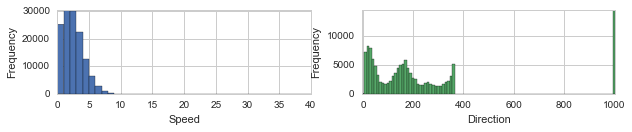

In [5]:
plot_speed_and_angle_distribution(df.speed, df.dir)

In [6]:
# Dir [10,360]=> [0,350]
df['dir'] = df['dir'].apply(lambda x: x%360 if x < 999 else x) 
# Convert Windrose coordianates to Polar Cooridinates 
df['dir_windrose'] = df['dir']
df['dir'] = df['dir'].apply(lambda x: (90 - x)%360 if x < 999 else x)
df.describe()

,date,HrMn,dir,speed,dir_windrose
count,1.317670e+05,131767.000000,131767.000000,131767.000000,131767.00000
mean,2.003839e+07,992.689292,258.366192,2.342578,229.19602
std,1.000501e+05,679.931123,278.811451,1.708145,286.23713
min,1.980010e+07,0.000000,0.000000,0.000000,0.00000
25%,2.001102e+07,400.000000,70.000000,1.000000,40.00000
50%,2.006073e+07,900.000000,190.000000,2.100000,150.00000
75%,2.011032e+07,1400.000000,300.000000,3.600000,250.00000
max,2.015123e+07,2354.000000,999.000000,20.600000,999.00000


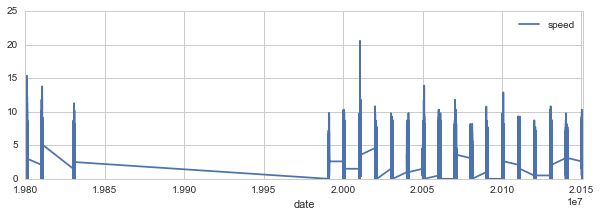

In [7]:
df.plot(x='date', y='speed',legend=True,figsize=(10,3))

### 1.2.1 Unit Detection

True


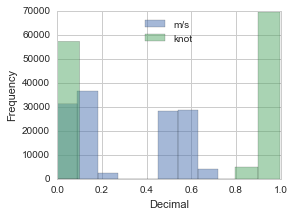

In [8]:
# Detect data stored in knot or m/s
## For data stored originally in knot, the data would cluster at 0.1 and 0.9
df['decimal'] = df.speed % 1 
df.decimal.hist(alpha=0.5, label='m/s', figsize=(4,3))
knot_unit = True if len(df.query('decimal >= 0.2'))/len(df) > 0.3 else False

# Using unit in knot instead of m/s
if knot_unit:
    df['speed']=df['speed']*1.943845
    df['decimal'] = df.speed % 1 
    df.decimal.hist(alpha=0.5,label='knot')
    # need more elaboration, some is not near an integer
    df['speed']=df['speed'].apply(lambda x: int(round(x)))
    plt_configure(xlabel='Decimal',ylabel='Frequency',legend={'loc':'best'})

print knot_unit

### 1.2.2 Sampling Type Selection

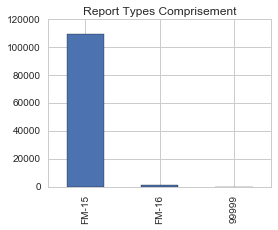

In [9]:
sample_type = df.query('date > 20000000')['type']
sample_type.value_counts().plot(
    kind = 'bar', title = 'Report Types Comprisement', figsize=(4,3))

report_type_most_used = sample_type.value_counts().argmax()
df = df.query("type==@report_type_most_used")

### 1.2.3 Sampling Time Selection

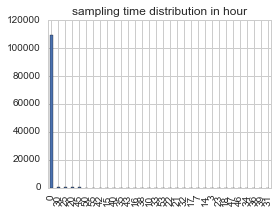

In [10]:
df['sample_time'] = df.HrMn % 100 
sample_time = df.query('date > 20000000')['sample_time']
sample_time.value_counts().plot(
    kind = 'bar', title = 'sampling time distribution in hour', figsize=(4,3))

sampling_time_most_used = sample_time.value_counts().argmax()
df = df.query("sample_time==@sampling_time_most_used")
df.drop(['sample_time'], 1,inplace=True)

In [11]:
df['HrMn'].value_counts().sort_index()

0       6110
100     6198
200     6197
300     6147
400     6148
500     6165
600     6110
700     6135
800     6134
900     6112
1000    6125
1100    6137
1200    6112
1300    6134
1400    6118
1500    6059
1600      63
1700      60
1800      34
1900      58
2000      51
2100    6029
2200    6089
2300    6070
Name: HrMn, dtype: int64

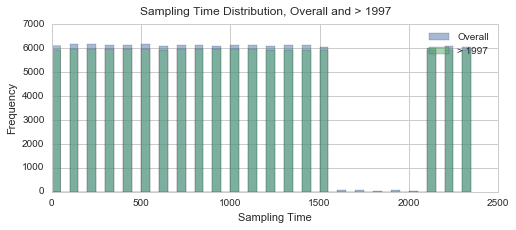

In [12]:
MID_YEAR = (min(df.date)//10000+max(df.date)//10000)//2
bins=arange(min(df.HrMn), max(df.HrMn) + 100, 50)

df['HrMn'].plot(
    kind='hist', alpha=0.5,bins=bins, label='Overall')

df.query('date > @MID_YEAR * 10000')['HrMn'].plot(
    kind='hist', alpha=0.5,bins=bins, label='> %s' %  MID_YEAR )

plt_configure(xlabel='Sampling Time', ylabel='Frequency', legend={'loc':'best'}, figsize=(8, 3), 
              title = 'Sampling Time Distribution, Overall and > %s ' %  MID_YEAR)

## 1.3 Data Wrangling

### 1.3.1 Artefacts handling

#### 1.3.1.1 wrong direction record

In [13]:
display(df.query("(dir % 10 >= 0.1) & (dir != 999)"))
df = df.query('(dir % 10 <= 0.1) | (dir == 999)')

,date,HrMn,type,dir,speed,wind_type,dir_windrose,decimal
30963,19990915,2200,FM-15,86,1,N,4,0.971923
31190,19990928,200,FM-15,89,2,N,1,0.943845
31903,19991106,2200,FM-15,86,1,N,4,0.971923
32457,19991207,1300,FM-15,86,9,N,4,0.941687
32816,19991228,2100,FM-15,146,3,N,304,0.915768
36231,20000701,1100,FM-15,262,5,N,188,0.053997
48784,20020530,100,FM-15,59,3,N,31,0.915768
49525,20020710,300,FM-15,79,2,N,11,0.943845
58978,20031205,2200,FM-15,65,5,N,25,0.053997
60113,20040206,900,FM-15,39,5,N,51,0.053997


#### 1.3.1.2 sudden increase in speed

,date,HrMn,type,dir,speed,wind_type,dir_windrose,decimal,incre,incre_reverse
42477,20010615,1200,FM-15,200,40,N,250,0.043207,36.0,38.0
106479,20100819,1100,FM-15,300,25,N,150,0.075601,19.0,21.0
45813,20011220,900,FM-15,70,23,N,20,0.937371,7.0,7.0
83200,20070423,700,FM-15,90,23,N,0,0.937371,14.0,20.0
70244,20050730,400,FM-15,130,23,N,320,0.937371,17.0,12.0
28481,19830723,200,FM-15,180,22,N,270,0.965449,19.0,22.0
28239,19830627,100,FM-15,150,21,N,300,0.993526,20.0,7.0
46571,20020131,900,FM-15,70,21,N,20,0.993526,6.0,7.0
125734,20130601,900,FM-15,60,21,N,30,0.993526,13.0,17.0
44545,20011010,800,FM-15,100,21,N,350,0.993526,15.0,18.0


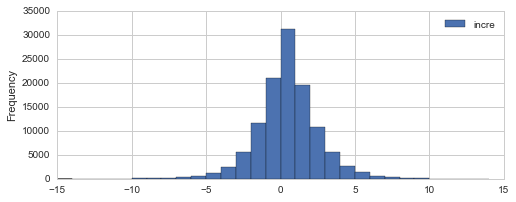

In [14]:
# sudden increse
df['incre'] = df.speed.diff(1)
df['incre'].fillna(0, inplace=True)
df['incre_reverse'] = df.speed.diff(-1)
df['incre_reverse'].fillna(0, inplace=True)

display(df.sort_values(by='speed',ascending=False).head(10))
df['incre'].plot(kind='hist', bins=arange(-15, 15), legend=True, figsize=(8, 3))

In [15]:
incre_threshold = 20 if knot_unit else 10
print 'sudden increase number', len(df.query('(incre > @incre_threshold )&(incre_reverse > @incre_threshold )'))
df = df.query('(incre < @incre_threshold )|(incre_reverse < @incre_threshold )')

sudden increase number 1


After Simple Aretefacts Handling

In [16]:
# Check the max speed
df.sort_values(by='speed',ascending=False).head(10)

,date,HrMn,type,dir,speed,wind_type,dir_windrose,decimal,incre,incre_reverse
106479,20100819,1100,FM-15,300,25,N,150,0.075601,19.0,21.0
83200,20070423,700,FM-15,90,23,N,0,0.937371,14.0,20.0
45813,20011220,900,FM-15,70,23,N,20,0.937371,7.0,7.0
70244,20050730,400,FM-15,130,23,N,320,0.937371,17.0,12.0
28481,19830723,200,FM-15,180,22,N,270,0.965449,19.0,22.0
95457,20090114,300,FM-15,70,21,N,20,0.993526,7.0,4.0
125734,20130601,900,FM-15,60,21,N,30,0.993526,13.0,17.0
28239,19830627,100,FM-15,150,21,N,300,0.993526,20.0,7.0
46571,20020131,900,FM-15,70,21,N,20,0.993526,6.0,7.0
44545,20011010,800,FM-15,100,21,N,350,0.993526,15.0,18.0


### 1.3.2 Re-distribute angle, for un-evenly sectored data
For some dataset, the 16 sectors are not record properly,

e.g. the sectors are [0,20,30,50], need to redistribute the angle into 22.5

In [17]:
display(df['dir'].value_counts().sort_index())
effective_column = df.query('dir < 999')['dir'].value_counts()[df['dir'].value_counts() > 30].sort_index()
SECTOR_LENGTH = 360/len(effective_column)
print len(effective_column), SECTOR_LENGTH

0       1450
10      1599
20      1729
30      2569
40      3831
50      4807
60      6667
70      7507
80      6668
90      4850
100     2898
110     2014
120     1762
130     1474
140     1185
150     1150
160     1137
170     1317
180     1495
190     1756
200     1640
210     1422
220     1365
230     1497
240     2252
250     2373
260     3170
270     3954
280     5389
290     4790
300     4614
310     4055
320     3244
330     2713
340     2009
350     1666
999    12562
Name: dir, dtype: int64

36 10.0


In [18]:
if len(effective_column) == 16:    
    # For some dataset, the angle is not evenly distributed, so there is a need to redistribute
    original_angle = list(effective_column.sort_index().index)
    redistributed_angle = linspace(0,360,num=17)[:-1]
    df['dir'].replace(to_replace=original_angle, value=redistributed_angle, inplace=True)
    display(df['dir'].value_counts().sort_index())

### 1.3.4 Dir 999 Handling (Zero Speed and Variable Direction)

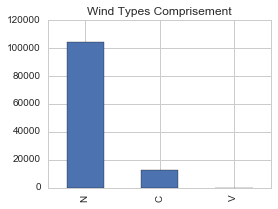

In [19]:
df['wind_type'].value_counts().plot(
    kind = 'bar', title = 'Wind Types Comprisement', figsize=(4,3))

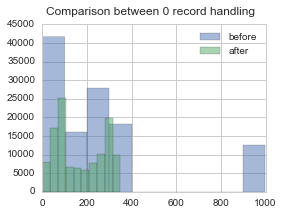

In [20]:
df['dir'].plot(kind='hist', alpha=0.5, label='before')
df['dir'] = df.apply(lambda x: np.nan if x.dir == 999 else x.dir, axis=1)
df['dir'] = df['dir'].interpolate()//SECTOR_LENGTH*SECTOR_LENGTH
df['dir'].plot(kind='hist', alpha=0.5, label='after')
plt_configure(title='Comparison between 0 record handling', figsize=(4,3), legend={'loc':'best'})

### 1.3.5 Time Shift Comparison

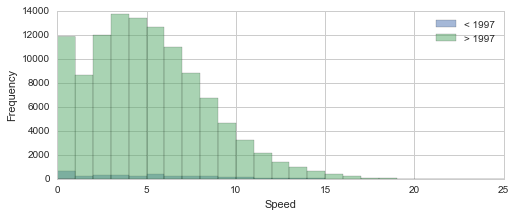

In [21]:
DIR_REDISTRIBUTE = 'even'
if DIR_REDISTRIBUTE == 'even':
    DIR_BIN = arange(-5, 360, 10) 
elif DIR_REDISTRIBUTE == 'round_up':
    DIR_BIN = arange(0, 360+10, 10) 

# Comparison between mid_year, looking for: 
# 1. Odd Even Bias
# 2. Time Shift of Wind Speed Distribution
bins = arange(0, max(df.speed) + 1)
df.query('date < @MID_YEAR * 10000')['speed'].plot(
    kind='hist', alpha=0.5,bins=bins, label='< %s' % MID_YEAR)

df.query('date > @MID_YEAR * 10000')['speed'].plot(
    kind='hist', alpha=0.5,bins=bins, label='> %s' % MID_YEAR)

plt.suptitle('Speed Comparison between year < %s, > %s ' % (MID_YEAR, MID_YEAR), fontsize = 14)
plt_configure(xlabel='Speed', ylabel='Frequency', legend=True, figsize=(8, 3))

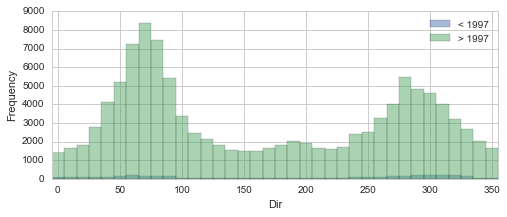

In [22]:
df.query('date < @MID_YEAR * 10000')['dir'].plot(
    kind='hist', alpha=0.5,bins=DIR_BIN, label='< %s' % MID_YEAR)

df.query('date > @MID_YEAR * 10000')['dir'].plot(
    kind='hist', alpha=0.5,bins=DIR_BIN, label='> %s' % MID_YEAR)

plt.suptitle('Dir Comparison between year < %s, and > %s ' % (MID_YEAR, MID_YEAR), fontsize = 14)
plt_configure(xlabel='Dir', ylabel='Frequency', legend={'loc':'best'}, figsize=(8, 3),tight='x')

1995 - 1999


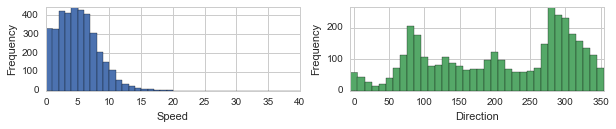

2000 - 2004


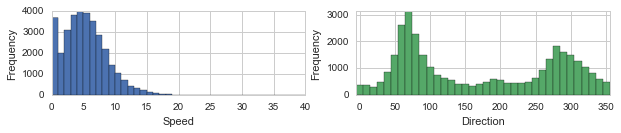

2005 - 2009


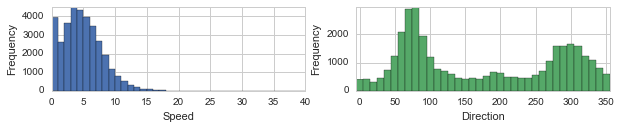

2010 - 2014


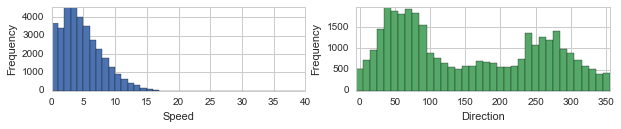

In [23]:
# Inspect the time shift of speed and degree distribution, and odd-even bias
check_time_shift(df)

## 1.4 Re-distribute Direction and Speed (Optional)
e.g. Dir 50 -> -45 ~ 55, to make KDE result better

In [24]:
def randomize_angle(df, sector_length = 10):
    if DIR_REDISTRIBUTE == 'even':
        df['dir_ran'] = df['dir'].apply(lambda x: (x + np.random.uniform(-sector_length/2,sector_length/2)))
    else:
        df['dir_ran'] = df['dir'].apply(lambda x: (x + np.random.uniform(0,sector_length)))

    bins=arange(0, 360+10, 5)
    df['dir'].hist(bins=bins, alpha=0.5, label='Original Data')
    bins=arange(0, 360+10, 1)
    df['dir_ran'].hist(bins=bins, alpha=0.5, label='Redistributed Data')
    plt_configure(xlabel="Direction", ylabel="Frequency", tight='x',
                  legend={'loc':'best'}, figsize=(8, 3))
    
    df['dir']=df['dir_ran']
    df.drop(['dir_ran'], 1,inplace=True)
    return df

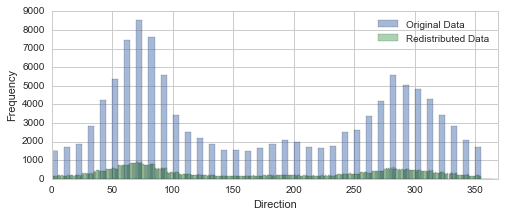

In [25]:
# Randomize the angle degree, to form a better KDE estimation
df = randomize_angle(df, SECTOR_LENGTH)

In [26]:
def randomize_speed(df):
    # Round down speed, need more caution
    if len(df.query('speed < 1')) > 200:
        # if has zero data
        speed_redistribution_info = 'Contain 0, Redistribute upward, e.g. 0 -> [0,1]'
        df['speed_ran'] = df['speed'].apply(lambda x: (x + np.random.uniform(0,1)))
    else:
        # if lack zero
        speed_redistribution_info = 'N0 0, Redistribute downward, e.g. 1 -> [0,1]'
        df['speed_ran'] = df['speed'].apply(lambda x: (x + np.random.uniform(-1,0)) if x > 0 else x)

    max_speed = df.speed.max()
    df['speed'].hist(bins=arange(0, max_speed), alpha=0.5, label='Original Data')
    df['speed_ran'].hist(bins=arange(0, max_speed, 0.5), alpha=0.5, label='Redistributed Data')
    print speed_redistribution_info
    plt_configure(xlabel="Speed", ylabel="Frequency", legend=True, figsize=(8, 3))
    
    df['speed']=df['speed_ran']
    df.drop(['speed_ran'], 1,inplace=True)
    return df, speed_redistribution_info

Contain 0, Redistribute upward, e.g. 0 -> [0,1]


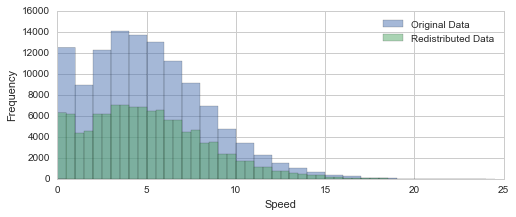

In [27]:
df, speed_redistribution_info = randomize_speed(df)

## 1.5 Generate (x,y) from (speed,dir)

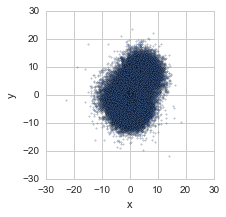

In [28]:
df['x'] = df['speed'] * cos(df['dir'] * pi / 180.0)
df['y'] = df['speed'] * sin(df['dir'] * pi / 180.0)
fig, ax = plt.subplots()
ax.set_aspect('equal')
df.plot(kind='scatter', x='x', y='y', alpha=0.35, ax=ax, s=2)
plt.gcf().set_size_inches(4, 3)

## 1.6 Re-select data, and overview of the clean dataset

In [29]:
## Summery of the data selection
print 'Knot unit?', knot_unit
print 'Incre_threshold for artefact detection:', incre_threshold
print 'Report type used:', report_type_most_used
print 'Sampling time used:', sampling_time_most_used
print 'Speed redistribution info:', speed_redistribution_info

df_all_years = df
df = df.query('(date >= 20100000) & (date < 20150000)')
df.describe()

Knot unit? True
Incre_threshold for artefact detection: 20
Report type used: FM-15
Sampling time used: 0
Speed redistribution info: Contain 0, Redistribute upward, e.g. 0 -> [0,1]


,date,HrMn,dir,speed,dir_windrose,decimal,incre,incre_reverse,x,y
count,3.451900e+04,34519.000000,34519.000000,34519.000000,34519.000000,34519.000000,34519.000000,34519.000000,34519.000000,34519.000000
mean,2.012064e+07,979.165097,153.860859,4.806710,233.121788,0.545143,0.000174,-0.000145,0.575653,0.254620
std,1.413766e+04,677.927853,102.874062,3.247801,282.375912,0.451468,2.028407,2.028414,3.495674,4.586653
min,2.010010e+07,0.000000,-4.995196,0.000481,0.000000,0.000000,-21.000000,-19.000000,-16.261808,-21.752322
25%,2.011040e+07,400.000000,61.357788,2.341964,50.000000,0.053997,-1.000000,-1.000000,-1.207280,-2.819536
50%,2.012063e+07,900.000000,130.834602,4.260014,160.000000,0.915768,0.000000,0.000000,0.417363,0.476037
75%,2.013093e+07,1400.000000,252.951851,6.767198,260.000000,0.943845,1.000000,1.000000,2.470625,2.897497
max,2.014123e+07,2300.000000,354.999834,25.851033,999.000000,0.997842,19.000000,21.000000,15.636165,19.237168


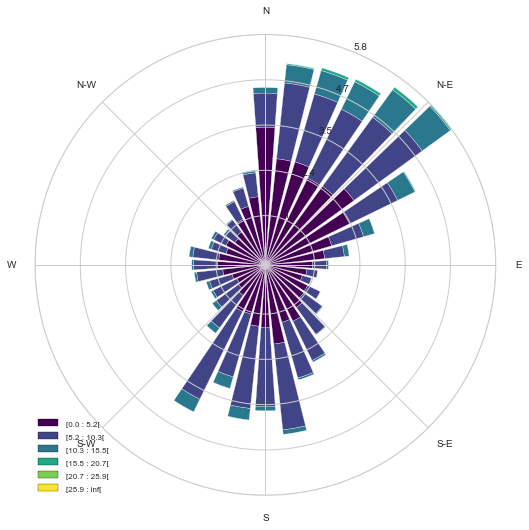

In [30]:
# 90 degree is in east
ax = WindroseAxes.from_ax()
viridis = plt.get_cmap('viridis')
ax.bar(df.dir_windrose, df.speed, normed=True, opening=0.8, edgecolor='white', nsector=36, cmap=viridis)
ax.set_legend()

In [31]:
ax, _params = WindAxes.from_ax().pdf(df.speed, bins=arange(0, max(df.speed)))
weibull_params = sp.stats.exponweib.fit(df.speed, floc=0, f0=1)
plt_configure(figsize=(4,3),xlabel='V',ylabel='PDF')

fig,ax = plt.subplots()
ecdf = sm.distributions.ECDF(df.speed)
x = linspace(0, df.speed.max())
y = ecdf(x)
plot(log(x), log(-log(1-y)),'o', label='ECDF')

k_shape, lamb_scale = weibull_params[1], weibull_params[3]
y=1-exp(-(x/lamb_scale)**k_shape) # cdf
plot(log(x), log(-log(1-y)),'-', label='Weibull')
plt_configure(legend={'loc':'best'},figsize=(4,3))
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAARwAAADZCAYAAADypo9TAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzt3XlYlPX+//HnMMOwiiiJ+xYKapYLaJotGNkR7ZuKaLil
RYtWJ44/TVNLPeJatrlgbi2SZpl2jnrMJZdM1AATCxNUxNJAEtFYlW1+f4wiyDYIM/cs78d1cQEz
9/Jirnr7uT/3fb9vlU6n0yGEECZgp3QAIYTtkIIjhDAZKThCCJORgiOEMBkpOEIIk5GCI4QwGaMW
HJ1Ox6xZswgJCeHZZ5/lwoUL5ZbJy8tjxIgRJCcnl7y2atUqQkJCGDp0KJs3bzZmRCGECRm14Hz/
/ffk5+ezceNGJk2axIIFC8q8Hx8fz+jRo8sUoujoaI4fP87GjRuJjIwkNTXVmBGFECZk1IJz7Ngx
HnnkEQC6dOlCfHx8mfcLCgqIiIjg3nvvLXnt0KFDeHt788orrzBhwgT69u1rzIhCCBPSGHPj2dnZ
1KtX7/bONBqKi4uxs9PXuW7dugH6Q69brl69SkpKCitXruTChQtMmDCBnTt3GjOmEMJEjFpwXF1d
ycnJKfm9dLGpjLu7O15eXmg0Gtq2bYuDgwMZGRk0bNiw0nWOHTtWZ5mFEDXj6+tr8LJGLTjdu3dn
//799O/fn7i4OLy9vatdx9fXl8jISMaNG0daWhrXr1+nQYMGBq1nKY4dO2ZReUEym4Kl5YWa/2Nv
1ILTr18/oqKiCAkJAWDBggVs376dvLw8hg0bVrKcSqUq+dnf35/Y2FiCg4NLznKVfl8IYbmMWnBU
KhX//ve/y7zWtm3bcsutW7euzO+TJ082ZiwhhELkwj8hhMlIwRFCmIwUHCGEyUjBEUKYjBQcIYTJ
SMERQpiMFBwhhMlIwRFCmIwUHCGEyUjBEUKYjBQcIYTJSMERQpiMFBwhhMmYZRN1gCtXruDv71/u
dSGE5TK7JuoAhYWFzJo1C0dHR2PGE0KYmNk1UQdYtGgRI0aMwNPT05jxhBAmZnZN1Lds2YKHhwd9
+vTh448/Nma8Mk5dPsXOszs5+udRrhdep2+bvgS2C8TnHh+TZRDC2pldE/UtW7agUqmIiooiISGB
qVOnsmLFCjw8PKpc724bqet0Or46/xUf/PYBRbqikte3Jm5l4q6JDGs9jNc7vo6Txumutl8ZS2z8
LpmNz9Ly1pTZNVH/4osvSn4eM2YMc+bMqbbYwN01US8oKuDl7S/z6clPaezSmIVPLOTR1o9ib2fP
9+e+570j77Hp9038nPkzm4dvpkuTLjXeR0UstVm2ZDYuS8sLNS+QRp3D6devH1qtlpCQEBYuXMi0
adPYvn07mzZtKrNcZU3Sjd08ff6P8/k07lN6NOtB7EuxjOs6jnsb3EvL+i15rttzxL4Uy5SHpnDu
6jkC1gXwa9qvRs0jhLUzyybq1b1eF35J+4W5P86lhVsL9ozZQ33H+uWWcdQ4sqjfInzu8SF0aygB
6wI4MO4AnRp1MlouIayZTV74V1BUwHP/fY7C4kJWPbWqwmJT2vPdnmfFwBVczr3MwA0DuZp31URJ
hbAuNllwImIi+Dn1Z8Z2GUtg+0CD1hnvN563H32b89fOM/Y/YynWFRs5pRDWx+YKTlFxER/99BFO
Gifee/K9Gq0767FZPHHvE2w7vY3FhxcbKaEQ1svmCs53Z78j+Voyo+4fhYdz9We/SlPbqVkftJ5m
9Zoxfe904i7FGSmlENbJqJPG5mh5zHIAXu35arn3ioqKSEpKqnA9Ly8v1Go1Ho4ehPuGE3oglNFf
j+brJ79GY6cps4wQomI2VXDOXDnDzrM7ebjVw3Rt0rXc+0lJSfj4JAN3nklLJjERvL29SUpKItS/
OQwezMmu/+G+Fz6FqBfLLCOEqJhNHVKtiF0BwKs9yo9ubmsLeN/xdWcBagu71kBOI/BfBg3UFSwj
hLiTzRQcnU7HxviNeDh5ENQxqPYbzPOA7z4C++vw5OTab08IG2AzBedE2glSs1MJbB+IVq2tm43G
h8DvD0PH/0DbI3WzTSGsmM0UnB1ndgAwoN2AOtyqCnZ+CDoV9J9PYXFhHW5bCOtjUwXHTmXHk15P
1u2GU30hbhw0Ps03576p220LYWVsouBk5GVw5OIRerXoVeNrbwyydz7kO7Esfhm5Bbl1v30hrIRN
FJw9SXso1hXX8eFUKdlN4OhYLuddZulPS42zDyGsgNk1US8sLGTKlCmMGjWK4cOHs2/fvlrn2HFW
P39j6H1Td+VwKPW19VkUtYhr168Zbz9CWDCza6K+detWGjRowPr161m9ejXh4eG1ylCsK+a7M9/R
xLVJhRf71ZnrbrzQ8QWuXr/Ku1HvGm8/Qlgws2uiHhgYSFhYGKBvSarR1O5i6LMZZ7mce5nH2z6O
ncq4R5BjvMfQxLUJS6KXkJ6bbtR9CWGJjPp/YGVN1G/p1q0bjRs3LtNE3cnJCWdnZ7KzswkLC2Pi
xIm1yhCbEgtAz2Y9a7UdQzhpnHizz5tk52fz/pH3jb4/ISyN2TVRB0hNTeW1115j9OjRDBhg2ERv
Zb1Vt5/crs+S5Vpt/9Xff/8d6Fzhe/Hx8WRlZVW7jF8LPzwcPPjoyEcEOAfgrnWvUV5zJpmNz9Ly
1pTZNVFPT08nNDSUmTNn0qtXL4P3VVnz6Qu/XMBOZUfIYyG4aF2q3Ebp0didOnfujLe3t0HLvFX8
FhN3TWR/3n7m9p5bbjlLbZYtmY3L0vJCzQukUQtOv379iIqKIiQkBIAFCxawfft28vLyGDZsWMly
pZulr1y5kszMTCIiIli+fDkqlYo1a9ag1db8doSi4iJ+Tv2ZTo06VVts6tILXV9g3g/z+PDIhwzy
HER97e0Wpl5eXibLIYS5Mbsm6jNmzGDGjBl1sv+E9ARyC3Lp0axHnWzPUCl/pJC+dTA8uYaer66H
g6/cfEffwkIIW2XVF/7dmjD2a+anwM4nQF4D6PUF2Den4jYXQtgWqy44MSkxgEIFJ98VfnodnK+A
72rT718IM2TVBSc2JRZ7O3u6NK6bJ2bW2E//hHwXeGgxqG8ok0EIM2K1BaegqIC4S3Hc3/h+HDQO
yoTI84DYl8HtT3jgi+qXF8LKWW3BOXn5JDeKbuDXVIHDqdKOToQie+jzLqjkWVbCtlltwYn/S38b
RZcmCh1O3ZLZAn4ZBfckgnftb0QVwpJZbcE5m3EWAG8PM3iKwuE39N/7rFE2hxAKs9qCcybjDADt
GrZTOAlwuRMk/h+0Ok7s5Vil0wihGOstOFfOoFVraenWUukoelFTAFh7aq3CQYRQjtU8CO/06dNl
f08/TUuXlqCrZAVT+6MPXOjKPvZxvv15fLGse2aEqAtWM8Lx8UnGxwf9V9er/J3/N0kx91T66F7T
U8Hh5wFYf269wlmEUIbVFJwyT8z0uDmsudJJyUDlJTxBS9eW/O/i/0jLTlM6jRAmZ0UFp5SG+jNU
ZLRSNseddGqe83mO/OJ8lkUvUzqNECZndk3UDVmnWg31Z6jIaFOL9MYx5N4h1LevT0RshDxSRtgc
s2uiXt06BvG4WXCutK5NfKNw1jgT3CaYjLwMFu1exOnTp8t9FRUVKR1TCKMwuybq1a1jkIZnoVAL
mU3uPrwRDWs9DHs7e+bsWoNPh6Lbk90++slv85noFqJumV0T9erWqZ5Of0h11Qt06lrlN5Z7HO/h
6TZPg0cK+CRSMtktPXOElTO7Jup323i9hPMVcLoGf+hHSbeanxcVFXHx4sUKV2nRogVqtbpOmqgb
skzr1q15WP0wm9kMvd+DhMEVbsfcWGKDb0vLbGl5a8rsmqjfzTpl3DpDdaU9cLux+enTp3nwwauU
H0Ekk5jobnC

# 2. Create input data, i.e. speed_set

In [32]:
# speed_set = array(zip(-df.x, -df.y)) # Adjust the direction to match for Cook's paper
SPEED_SET = array(zip(df.x, df.y))
if 'params' not in globals():
    NUMBER_OF_GAUSSIAN = 3
    FIT_METHOD = 'square_error'
    KDE_GRIDSEARCH = True
DEFAULT_BANDWDITH = 1.5 if knot_unit else 0.7
fig_list = []

In [33]:
FITTING_RANGE = []
fit_limit = ceil(df['speed'].quantile(.95))
fitting_axis_range = arange(-fit_limit, fit_limit+1, 1)
print fitting_axis_range

for i in fitting_axis_range:
    for j in fitting_axis_range:
        FITTING_RANGE.append([i,j])

[-11. -10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.   2.   3.
   4.   5.   6.   7.   8.   9.  10.  11.]


In [34]:
plot_limit = ceil(df['speed'].quantile(.975))
PLOT_AXIS_RANGE = arange(-plot_limit, plot_limit+1, 1)

# 3. Kernel Density Estimation

In [35]:
sample = SPEED_SET
KDE_KERNEL = 'gaussian'
# KDE_KERNEL = 'tophat'
# bandwidth = 1

In [36]:
# The bandwidth value sometimes would be too radical
from sklearn.grid_search import GridSearchCV

if KDE_GRIDSEARCH == True:
    if knot_unit:
        bandwidth_range = arange(0.5,2,0.2)
    else:
        bandwidth_range = arange(0.4,1,0.1)

    grid = GridSearchCV(neighbors.KernelDensity(kernel = KDE_KERNEL),
                        {'bandwidth': bandwidth_range},
                        n_jobs=-1, cv=4) 
    grid.fit(sample)
    bandwidth = grid.best_params_['bandwidth']

In [37]:
if 'bandwidth' not in globals():
    bandwidth = DEFAULT_BANDWDITH
    
kde = neighbors.KernelDensity(bandwidth=bandwidth,kernel = KDE_KERNEL).fit(sample)

points = FITTING_RANGE
# very slow if the dataset is too large, e.g. 100,000
# kde returns log prob, need to convert it
kde_result = exp(kde.score_samples(points))
print 'bandwidth:', bandwidth, len(kde_result)
print kde_result[:5]

bandwidth: 0.7 529
[  5.43006127e-06   8.72575654e-06   2.37894942e-05   3.29947639e-05
   2.21265420e-05]


In [38]:
# Plot jPDF
X = Y = PLOT_AXIS_RANGE
# Can't work if pass as generate_Z_from_X_Y(X,Y, exp(kde.score_samples())), need to use lambda
# see http://stackoverflow.com/questions/21035437/passing-a-function-as-an-argument-in-python
kde_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(kde.score_samples(coords)))
colorbar_lim = 0, kde_Z.max()

plot_3d_prob_density(X,Y,kde_Z)

fig_kde,ax1 = plt.subplots(figsize=(4,3))
plot_2d_prob_density(X,Y,kde_Z,xlabel='x', ylabel='y',ax=ax1)

with sns.axes_style({'axes.grid' : False}):
    fig_hist,ax2 = plt.subplots(figsize=(4,3))
    _,_,_,image = ax2.hist2d(df.x, df.y, bins=PLOT_AXIS_RANGE, cmap='viridis',)
    ax2.set_aspect('equal')
    plt.colorbar(image)
    plt_configure(ax=ax2, xlabel='x',ylabel='y')
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAUEAAAFBCAYAAADpDh0xAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsfXm4HFWZ/lvVe/ddSJAwCCGBAA5ECZLwm3EhMpAoOAOJ
YGYMIksyijjMOOzEEEIWDC6jjEgeQXBEMgomQIKgOEQGkSHsEkhEcAsMTASR5C69V1f9/uj7nXvq
9Km9um/XvfU+z32Se7urTnV11Vvf+n6KYRgGYsSIEWOCQh3rA4gRI0aMsURMgjFixJjQiEkwRowY
ExoxCcaIEWNCIybBGDFiTGjEJBgjRowJjZgEY8SIMaERk2CMGDEmNGISjBEjxoRGTIIxYsSY0IhJ
MEaMGBMaMQnGiBFjQiMmwRgxYkxoxCQYI0aMCY2YBGPEiDGhEZNgjBgxJjRiEowRI8aERkyCMWLE
mNCISTBGjBgTGjEJxogRY0IjJsEYMWJMaMQkGCNGjAmNmARjxIgxoRGTYIwYMSY0YhKMESPGhEZM
gjFaYBgGdF2HYRhjfSgxYrQdybE+gBjdBV3XoWkaKpUKFEVhf8/n80gkEmN4ZDFitAcxCcZgKJfL
GBoaQjabhaqqMAwD5XIZjUYDuq5DVVUkk0n2b0yKMcYDYhKMAcMw0Gg0UK/X0Wg0UK1WGenpug4A
zCrUNA2GYaBarUJVVSQSiZgUY0QaihEHfiY0yP3VdR3VahWlUkn6PkVRkEgk2I+qjoaT6RKKSTFG
FBGT4ASGpmloNBoAgGq1imKxCABIJBLI5XJoNBqoVCrSBElMijHGC2ISnIAwDMNEgKVSCdVqlb2e
y+WQTCZNMcF8Ps/cZvrhQaRIMcOYFGNEBXFMcIJB13XU63VGaMPDw9B1HYlEAplMxtYdJhIDRsto
eFLUNA2apgEYJTz6URSFkS/FFIlIc7kcUqlUTIoxxgQxCU4Q8FYckRARXiaTQT6fZwTmBrw7TPsX
SZEIF5CTIpGmoiio1WomSzGdTptKdGLEaBdiEpwA4JMfhmGgWCyiXq9DURQUCgWk0+nAa/ghRT4S
I7MUeeJMpVIxKcZoC2ISHOcgN5UIplgsQtd1JJNJ9PT0mGJ3hDDCxFakSLFIKr0BmvWJdu5zvV5H
pVKJSTFGWxCT4DiF6P5WKhWUy2UAzRhcNpt1RSL0HsMwApGOjBTL5bKpHtHJfY5JMUY7EJPgOESt
VsPQ0BBSqRRSqRSGh4ehaRpUVUWhUEAqlRrrQ2SJFl3XGSGLrnNMijE6gZgExxkajQZqtRpqtRoM
w0CpVIJhGEilUigUClL3lzCWpKEoCpLJJJLJ5iUpluN4JcVSqQRN05BKpVj2OSbFGDLEJDhOwNf+
UUyPCCOfzyOTyUSKBLySoqxwm15TFIUlWqhGMZlMRup8xGgfYhIcB+Br/3RdZ6UviqKgt7eXEYlb
UPyvm+ronUhRLOAmIuQTMDxxkjsek2KMmAQjDr7zo1arsdY3AEin054JMCpwYykCzfBAsViUWoox
KcYAYhKMLPgaPAAoFouo1WoAmtlfygRPFIikSJqIVI8oWooxKcYgxCQYQfC1f2LrW09PDys/8Yrx
dJPTZ6F2QLFwOybFGISYBCMEu9a3bDaLXC7HSk1imEEERuVBQUmR3p/NZpHNZlmGOkb0EJNgROCn
9S2szo+w9tVJOB1vUFIkMkwkEiz+SK+RGERMitFATIIRAKk+A81Y1/DwMAzDsG19CwLDMCJHelZw
S0ReSFFRFLZfCkMoimJZtkOyYTEpdidiEuxiaJqGWq3GbrpyuYxKpQLAvvUtjJut20pkOg2eFOmh
IMs+12o1ZhHyhds8KVLCSpzPEpNidyAmwS6FrusYGhpCpVJBoVBAtVplrW89PT1tKX3hXV9ytScy
ERKI1HhSJPKj7DOvpSiqbtP2RKAxKXYXYhLsQvC1fwBY7V86nUY+n3ft/volMGo9E/9GRDDRwZNV
JpNpKcMRBWatRhHwpEjviUmx84hJsIsgyt7zRNSJ1jeyUCjeSDc2HQtZh3GcywyZpWinuu2GFMmV
TqfTcfa5zYhJsEvA1/7puo7h4WFGQPl8Htls1vW+vN4sJLRAc0YSiQTy+Tx0XUelUoGmaSZSdJLR
n+hwIzDrRIo0/Q9ohkZiS7F9iElwjGFX+5dMJlkcsF2gYutGo8FuPn49utGo7MOPjP5Ehx9SlOk4
0vti9zlcxCQ4hhBr/0qlErvAC4UCe90vnGKC/JjNTCaDXC6HvXv32m4ju6G9qLvEN6o7UqTvrlar
QdM06YPFihRTqVR8rj0gJsExAl/7x7e+JZNJFAoFJBIJVg4TdoZWdH8LhQIymYzlfGG7Y/Cq7sLf
zHHmuQkZKVL2WVZ/aGVtx6ToDzEJdhhi8oOXvedb3wD/9X522/HuL/Uahznq0ooU6TPLZhbX63Um
ehqVG5UIvB3Hy5+HTCbDulK8hiBiUnSHmAQ7CNH9Jdl7RVHQ09NjKXvv12IStxPd33w+L70RwrTQ
RFLkb2Zy9cXMs5g1negIY7wpMEqKJDBL8V8qu5qopBiTYIfAW39865sb2fugsHJ/xwJ8J0a5XEaj
0WBlJZQcELOmceDfDK9xWZEU6VojD4SSL2Lx9kRBTIJthqZpGBoaQiKRQDqdNrW+OdX+BZ3uBvh3
fztBOHzmmQqO7bKmEynz7MUa9zufhciPziM/83kikWJMgm0E9Y1WKhWk02lUKhVWiuKl9c2ve6rr
OgYGBgDYu7+EsSaVsNw+2pb2GWX4OX63pEivlUol6XnkSZHO9XgkxZgE2wCZkjF1Y6TTaRQKhbbe
nKIKzFi6v0EQpByn3ZnnKGW2rUiRPBKZpUhER7FCCleMR1KMSTBk8MkPACaFZ69k5Icoyf0l9Pf3
e75Au1VKy2s5DgBWbN6uwH8ULU16uADNB0c2m215uNBDm94j1nqOJ1KMSTBE8K1vfO0f0Oz+8GuN
uSUkPvsLmC/28Qinchz6nR5EdHPyyi7dik6680FqPe1IkRIwqVTKsvKhGxCTYAgQa//41rdMJsMC
zV7hdhtZ9rdcLk84ZWn+Zq7X66hWq+zGditiECNcUqRJf/l8Htu2bcOUKVMwa9assfpoUsQkGBBO
svepVArVajUQidhta5X99TttrputIz9IJBJSYdSJXo7jxdK0q/W0I0V6sBApPvnkk3jPe97jSIKG
YeCaa67BSy+9hHQ6jWuvvRZTp05lrz/00ENYv349kskkzjjjDCxatAi6ruOqq67CH/7wB6iqilWr
VuGwww7Diy++iPPPPx/Tp08HACxevBinnHKKab2YBANArP0rFous9a0dsvci7IqfY0FUM7zKXU2k
chyv8DqfRdM0/Pd//zfK5bIrNaStW7eiVqvhjjvuwPbt27Fu3TqsX7+e7eu6667D3XffjUwmg8WL
F+Okk07Cs88+C0VR8IMf/ABPPvkkvva1r2H9+vXYsWMHlixZgnPPPddyvZgEfcCu9c1K9t4PIVnd
eO0ufuaVS8YrgpbjdCr7HIXvwYoU6R55+eWXcdlllwEAfvzjH+Pee+/F3/zN3+D000+Xfr5nnnkG
xx9/PABg1qxZ2LFjB3vtd7/7HaZNm4aenh4AwOzZs/HUU0/hIx/5CE488UQAwOuvv47+/n4AwM6d
O7Fr1y5s3boV06ZNw/Lly5HP583HH/L5GPegzBkF3oeGhlAul6GqKnp7e029v4SgFzJ/wzUaDQwO
DqJarSKRSKC/v9+SAGNL0D2IFNPpNHK5HAqFArLZLCvkJkKsVCrM4gfAwiBRQztJlgiRJiAeeeSR
WLNmDWbOnIlcLocHH3wQX/jCF7B7927p9sPDw+jt7WW/J5NJdr7F1wqFAoaGhti6V155Ja699lqc
euqpAJokevn

In [39]:
kde_cdf = cdf_from_pdf(kde_result)

# 4. GMM by Expectation-maximization

In [40]:
sample= SPEED_SET
clf = mixture.GMM(n_components=NUMBER_OF_GAUSSIAN, covariance_type='full')
clf.fit(sample)
print clf.converged_

True


In [41]:
gmm_em_result = read_gmm_em_result(clf)
pretty_print_gmm(gmm_em_result)  

,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.365,1.170,3.731,4.729,3.960,0.465
2,0.330,0.003,-4.367,3.060,3.041,0.275
3,0.305,0.482,1.086,1.548,1.403,0.343


GMM Plot Result
0.365035408477 [[ 1.17037     3.73149441]] [ 3.11469454  5.32386855] -55.4956302297
0.329563608691 [[  3.33432269e-03  -4.36690885e+00]] [ 2.59822144  3.44448154] -45.6473318663
0.305400982832 [[ 0.48240585  1.08600465]] [ 1.18656829  1.71948489] -52.9728762463


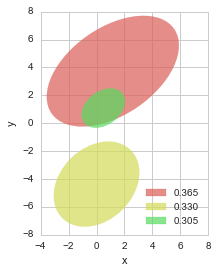

In [42]:
fig,ax = plt.subplots(figsize=(5,4))
plot_gmm_ellipses(gmm_em_result, ax=ax)

In [43]:
X = Y = PLOT_AXIS_RANGE
pdf_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(clf.score_samples(coords)[0]))

def residule_between_kde_and_gmm(points):
    kde_vals = exp(kde.score_samples(points))
    gmm_vals = exp(clf.score_samples(points)[0])
    return kde_vals - gmm_vals 

residual_Z = generate_Z_from_X_Y(X,Y, residule_between_kde_and_gmm)

plot_3d_prob_density(X,Y,pdf_Z)
plot_3d_prob_density(X,Y,residual_Z)
align_figures()

fig = plt.figure(figsize=(4,3))
plot_2d_prob_density(X,Y,kde_Z,xlabel='x',ylabel='y', colorbar_lim=colorbar_lim)
fig_em = plt.figure(figsize=(4,3))
plot_2d_prob_density(X,Y,pdf_Z,xlabel='x',ylabel='y', colorbar_lim=colorbar_lim)
fig = plt.figure(figsize=(4,3))
plot_2d_prob_density(X,Y,residual_Z,xlabel='x',ylabel='y')
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAUEAAAFBCAYAAADpDh0xAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvXmYHWWZNn7X2ZfuDiEsIoQAAZRECSPxm2HQgNhRcAYS
lfCDGAMk48IM1zjsxICBQAzKzMgMkgGFEUyUJQESlG0IMfBDdpRAIoufGCIBZYCk+/RZa/v+OP28
/Z731L6cPtVd93X1lXSfU/XWqVN117Pej6Truo4YMWLEGKdIjPYBxIgRI8ZoIibBGDFijGvEJBgj
RoxxjZgEY8SIMa4Rk2CMGDHGNWISjBEjxrhGTIIxYsQY14hJMEaMGOMaMQnGiBFjXCMmwRgxYoxr
xCQYI0aMcY2YBGPEiDGuEZNgjBgxxjViEowRI8a4RkyCMWLEGNeISTBGjBjjGjEJxogRY1wjJsEY
MWKMa8QkGCNGjHGNmARjxIgxrhGTYIwYMcY1YhKMESPGuEZMgjFixBjXiEkwRowY4xoxCcaIEWNc
IybBGG3QdR2apkHX9dE+lBgxQkdqtA8gRndB0zQoioJarQZJktjfC4UCksnkKB5ZjBjhICbBGAzV
ahWlUgm5XA6JRAK6rqNarUJVVWiahkQigVQqxf6NSTHGWEBMgjGg6zpUVYUsy1BVFfV6nZGepmkA
wKxCRVGg6zrq9ToSiQSSyWRMijEiDUmPAz/jGuT+apqGer2OSqVi+D5JkpBMJtlPIjESTqZLKCbF
GFFETILjGIqiQFVVAEC9Xke5XAYAJJNJ5PN5qKqKWq1mmCCJSTHGWEFMguMQuq63EGClUkG9Xmev
5/N5pFKplphgoVBgbjP98CBSpJhhTIoxooI4JjjOoGkaZFlmhDY0NARN05BMJpHNZi3dYSIxYKSM
hidFRVGgKAqAEcKjH0mSGPlSTJGINJ/PI51Ox6QYY1QQk+A4AW/FEQkR4WWzWRQKBUZgTsC7w7R/
kRSJcAFjUiTSlCQJjUajxVLMZDItJToxYoSFmATHAfjkh67rKJfLkGUZkiShWCwik8n4XsMLKfKR
GCNLkSfOdDodk2KMUBCT4BgHualEMOVyGZqmIZVKoaenpyV2RwgiTGxGihSLpNIboFmfaOU+y7KM
Wq0Wk2KMUBCT4BiF6P7WajVUq1UAzRhcLpdzRCL0Hl3XfZGOESlWq9WWekQ79zkmxRhhICbBMYhG
o4FSqYR0Oo10Oo2hoSEoioJEIoFisYh0Oj3ah8gSLZqmMUIWXeeYFGN0AjEJjjGoqopGo4FGowFd
11GpVKDrOtLpNIrFoqH7SxhN0pAkCalUCqlU85IUy3HckmKlUoGiKEin0yz7HJNiDCPEJDhGwNf+
UUyPCKNQKCCbzUaKBNySolHhNr0mSRJLtFCNYiqVitT5iBEeYhIcA+Br/zRNY6UvkiSht7eXEYlT
UPyvm+ro7UhRLOAmIuQTMDxxkjsek2KMmAQjDr7zo9FosNY3AMhkMq4JMCpwYikCzfBAuVw2tBRj
UowBxCQYWfA1eABQLpfRaDQANLO/lAkeLxBJkTQRqR5RtBRjUoxBiEkwguBr/8TWt56eHlZ+4hZj
6Sanz0LtgGLhdkyKMQgxCUYIVq1vuVwO+XyelZrEaAURGJUH+SVFen8ul0Mul2MZ6hjRQ0yCEYGX
1regOj+C2lcnYXe8fkmRyDCZTLL4I71GYhAxKUYDMQlGAKT6DDRjXUNDQ9B13bL1zQ90XY8c6ZnB
KRG5IUVJkth+KQwhSZJp2Q7JhsWk2J2ISbCLoSgKGo0Gu+mq1SpqtRoA69a3IG62biuR6TR4UqSH
glH2udFoMIuQL9zmSZESVuJ8lpgUuwMxCXYpNE1DqVRCrVZDsVhEvV5nrW89PT2hlL7EN6UxiNR4
UiTyo+wzr6Uoqm7T9kSgMSl2F2IS7ELwtX8AWO1fJpNBoVBw7P6OZ0suTPBklc1m28pwRIFZs1EE
PCnSe2JS7DxiEuwiiLL3FFsCotn6Nl5gZClaqW47IUVypTOZTJx9DhkxCXYJ+No/TdMwNDTEyLBQ
KCCXyznel9+bJbYg/cGJwKwdKdL0P6AZGoktxfAQk+Aow6r2L5VKsThgJ6GqKkqlUstNFhOjd3gh
RSMdR3pf7D4Hi5gERxFi7V+lUmEXeLFYZK97hVfioswnv32tVmuzVuKbzhuckCKd+0ajAUVR2hIt
gDkpptPp+PtxgZgERwl87R/f+pZKpVAsFpFMJlk5TCesMKo/BMBImCxTGoZkVEDMWyHxTecNRqRI
2Wej+kMjLUUgJkWviEmwwxCTH7zsPd/6BniP7bnZTnTBAbTEpcgVpyyoVQGx2TD2sQh6MIVBLPwD
JZvNsq4UN5P8gJgUnSImwQ5CdH9J9l6SJPT09JjK3nu1BO22o/Y73gUna9AIdgXERsH+OF7lH0GM
NwVGSJEEZukhR2VX4/U7ikmwQ+CtP771zYnsfVjHw7vgPT09rm4Ct2UhZjdmDPcwIkU3owjoWiMP
hJIvYvH2eEFMgiFDURSUSiUkk0lkMpmW1je72j+/092MYKU+I84Bdrue17nDcea5HW7Oidf5LER+
9F3zM5/HEynGJBgiqG+0Vqshk8mgVqtBVVXXrW9BkYSR+8urzwRpnTmxVgjVajXwzHOYMbtOwsvx
OyVFeq1SqRha6TwpEnGORVKMSTAEGCkZU79oJpNBsVjsyM3Jk6fo/lIGulMwujFp7rBZ5rmby3Gi
ZL2akSJ5JEaWIhEdnXtK6I1FUoxJMGDwyQ8ALQrPxWIR2WzW8b6CuPGt3F+rbcK+ySmeqGka8vk8
ALRYK1HJPHcbOTsBnU+g+bDJ5XJtliI9tOk94gNpLJFiTIIBwkz2Hmh2f7ghQB5eCIkuVCv3t5tg
p+fnpPd2LKGT7ryd++zESjciRfpe0um0aeVDNyAmwQAg1v7xllc2m2WBZrfwcwOQNddoNNjsES9P
59FSljYqx6FzHGeew0WQpEiT/gqFAp566inss88+mDFjxmh9NEPEJOgTdrL36XQa9XrdF4m43ZZf
L5vNolAoOCaGbiQQymCSFesk8zxa5B0VuLE0RVJ0OoqALEEixWeffRYf//jHbUlQ13VcccUVeO21
15DJZLBixQpMnjyZvb5p0yasWrUKqVQKX/7ylzFv3jxomobLLrsMf/zjH5FIJHDllVfi0EMPxY4d
O3DppZcikUjgsMMOw7Jly9rWG3t+RAehKAobeq4oCgYHByHLMlKpFCZMmIBMJtNRUqECbH72cKeS
MJ0EucOZTAb5fB7FYhH5fJ51QtBNCjQTUtVqFY1Go6UnN4Z3kIWey+VQLBZZqRdN4CM5MEq8KIqC
X/3qV6hWq47UkDZu3IhGo4E77rgDF1xwAVauXMleUxQF11xzDW699VasXr0ad955Jz744ANs2rQJ
kiTh9ttvx7e+9S384Ac/AACsXLkS559/PtasWQNN07Bx48a29WJL0AOsWt/MZO+9xvWcgmKQqqqy
GjA/nSZRIk6jchy7nme/meewyTRKJT5m8Vy6R15//XVcdNFFAIAHHngA9913Hz7zmc/gS1/6kuHn
e+GFF/DpT38aADBjxgxs3bqVvfaHP/wBU6ZMQU9PDwDg6KOPxnPPPYfPf/7zOOGEEwAAO3fuRF9f
HwBg27ZtmDlzJgBg1qxZePLJJ9Hf3996/EGejPEAypyRVVEqlVCtVpFIJNDb22uYeQ1b369er2Ng
YACqqiKbzaKvr6+t+Hk8gc9+UklSLpdrs1Sq1SrK5TJqtRpkWWYhDbdrRRFhkiwRIoUvjjjiCFx1
1VWYPn068vk8HnnkEXz729/GO++8Y7j90NAQent72e+pVIolGMXXisUiSqUSW/fSSy/FihUrcPLJ
J7d8TvG9PGJ

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAARAAAADZCAYAAADomm/dAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAHFlJREFUeJzt3XtQU2feB/AvSQxUQJFVUdAFi9a1XW9o3e62dVy7VNzZ
drUGpXhZd6mXtsy0ilRU5FIFHGtXZwdttc5sFaVYdWdYO75r9UXxbXUUacURhdYriG1Ki6sRK7ec
94+YYyLkdsjtJN/PjNMkJyfPA9N8eZ5znvM7AYIgCCAikkDh6Q4QkXwxQIhIMgYIEUnGACEiyRgg
RCQZA4SIJFN5ugNE1D2CICAnJwe1tbVQq9XIy8vD4MGDxe1lZWXYsmULVCoVZsyYgcTEROj1emRm
ZuLq1atQKBTIzc3F0KFDcfHiRaxduxZKpRJqtRrr169HeHi41caJSMY+//xzISMjQxAEQTh79qzw
+uuvi9va2tqE+Ph4QafTCa2trcKMGTOEn376STh8+LCwcuVKQRAE4dSpU8Ibb7whCIIgzJkzR6ip
qREEQRBKSkqEgoICq21zBEIkc5WVlXj++ecBAKNHj8b58+fFbZcvX0Z0dDRCQkIAAOPGjUNFRQWm
TJmCyZMnAwAaGhrQq1cvAMDGjRvRt29fAEB7ezsCAwOtts0AIZK5u3fvIjQ0VHyuUqmg1+uhUCg6
bQsODoZOpwMAKBQKZGRk4MiRI/jHP/4BAGJ4fPXVVyguLsauXbusti3bAKmsrPR0F4isGjdunF3v
+/rs/0LfEWZxu1qtxsiRIy1uDwkJQXNzs/jcGB7GbXfv3hW3NTc3i6MNAFi3bh1++uknJCYm4uDB
gwgKCsLBgwexdetWbNu2DX369LHad9kGCAB8mv9/TvssnU5nltTuxvZ9q/2ZK5+3+736jjD0G1xg
cXtj/Qqr+8fFxeHo0aNISEjA2bNn8cQTT4jbYmNjcf36ddy5cwdBQUE4c+YMUlJSUFpaCq1Wi4UL
FyIwMBAKhQIKhQKlpaX49NNPUVRUZBY0lsg6QIgIiI+Px5dffomkpCQAQEFBAT777DP8/PPPSExM
xIoVK/C3v/0NgiBAo9Ggf//+ePHFF7FixQrMmTMH7e3tWLVqFVQqFfLz8xEZGYk333wTAQEBmDBh
AlJTUy22zQAhkrmAgADk5uaavTZkyBDx8aRJkzBp0iSz7Y899hg2bdrU6bNOnTrlUNtcSEZEkjFA
iEgyBggRScYAISLJGCBEJBkDhIgkY4AQkWQMECKSjAFCRJIxQIhIMgYIEUnGACEiyTwWIFVVVZg7
dy4AoK6uDsnJyZgzZ06ni4KIyHt5JEC2b9+OzMxMtLW1ATBcfrx06VLs2rULer0eR44c8US3iGRJ
EARkZ2cjKSkJ8+bNQ319vdn2srIyaDQaJCUlYe/evQAM5QrfeecdzJ49GzNnzkRZWRkAoKamBrNm
zcLs2bOxatUqm217JECio6OxefNm8Xl1dTXGjx8PAJg4cSJOnjzpiW4RydKRI0fQ2tqKkpISpKWl
oaDgYXGi9vZ2rFu3Dh9//DGKioqwZ88eNDU14d///jf69OmD3bt346OPPsKaNWsAAIWFhUhNTcXu
3bvR0tKCY8eOWW3bI/VA4uPj0dDQID4XBEF8bFqzkYhsk1JUeerUqUhISABgKIGoUhmiYMSIEbh1
6xYEQUBzc7P4uiVeUVDIWL8R6Fyz0RpnB42ng4vt+3f7UkkpqvzYY4+J+7711ltYsmQJACAmJgbv
vvsuPvzwQ4SGhmLChAlW2/aKAHnyySdRUVGBp59+GsePH8czzzxj137OrGHpazU52b682tf+fMXi
NlvHGaQWVf7uu++QmpqKOXPm4I9//CMAIC8vD8XFxYiNjcXu3buxbt06ZGVlWWzbKwJk+fLlWL16
Ndra2hAbGysOrYj8Ra1+isVtI2zs60hR5YqKCqSkpODHH39ESkoKsrKyzP5gh4WFidOdiIgIfP31
11bb9liAREVFoaSkBIBh2FRUVOSprhDJmiNFlRMTE9G/f3/k5eXhzp072LJlCzZv3oyAgABs374d
a9aswdtvvw2VSgW1Wi0eXLUkQDA9gikjlZWVvK0D2/fa9meufN7u+8JUVlbiYvg+i9tHNGns/ix3
40pUIpKMAUJEkjFAiEgyBggRScYAISLJGCBEJBkDhIgkY4AQkWQMECKSjAFCRJIxQIhIMgYIEUnG
ACEiyRggRDLnzKLKRgcOHBDLA1jjFQWFiEg606LKVVVVKCgowJYtWwA8LKr8r3/9C4GBgXj11Vfx
wgsv4NixY+jTpw/Wr1+P27dvY9q0aZg8eTIA4MKFC9i/f79dbXMEQiRz9hZV7tGjh1lR5bfeeguA
eVHlW7duYdOmTXbd0gHgCIRI9pxVVFmv1yMzMxMZGRlQq9Wwp9YYA4TIC3yra7C4zVZNVGcVVT53
7hzq6uqQk5ODlpYWXL58GQUFBVixYoXFthkgRF7gdttvJe/rrKLKo0aNwoEDBwAADQ0NSEtLsxoe
AAOESPacWVRZrVY71DaLKj/ga0V92b5n23e0qHIRTlvcPhcTWFSZiHwPpzBkUe2dFrveN7xXoIt7
Qt7KqwLklVdeEe+KNWjQIOTn53u4R/7LGB6P/3qQ1fddOX8DtXdaGCJ+ymsCpLW1FQCwc+dOD/eE
7A0P0/fUnr8BgKMRf+M1x0Bqampw7949pKSkYP78+aiqqvJ0l/ySI+FhSgySOy12T31I/rxmBBIU
FISUlBQkJibi2rVrWLBgAQ4dOiQuiCHXkxoeRsb9jNMaI45KfJfXBEhMTAyio6PFx2FhYWhsbERE
RITFfXQ6nVP74OzPk0v7de0KGAaj7Rj4+C+63Y9+0b3Fx99d+QnVt9rF579U6S3u56+/fznzmgDZ
v38/vvnmG2RnZ0Or1aK5uRn9+vWzuo8zz9v72joEexhHCSql4UvvivZDRz/8zCvnb+Cm0PWIxB9/
/77Aa+YHGo0GOp0OycnJSEtLQ35+PqcvLmQ6XZE6ZXGU6XES8g1eMwLp0aMHNmzY4Olu+LzuHufo
rsd/PYinfn0I/8T7CdOzI54KDyOORHwHA8QPeGK6YgtDxDd4zRSGXMNbRh1dMV2EFhng4c6QJAwQ
H9bd8Ki61yQ+Ht0z3Cl9IucTBAE5OTmora2FWq1GXl4eBg8eLG4vKyvDli1boFKpMGPGDCQmJqK9
vR0rV65EQ0MD2trasHjxYkyePBl1dXXIyMiAQqHAsGHDkJ2dbbVtBoiPcjQ8vsV9KO+1mb02dKhh
Dc6lS1qGiRdzZlHlgoICLF26FOPHj0d2djaOHDmCP/zhDxbbZoD4MHvCwxgMkZGhFtdBGIMEYJh4
I3uLKgMwK6qckJAAwLyocnV1NcaPHw8AmDhxIk6cOMEA8Te1d1ocCo+hQyPsXoXZVZgwRDzLWUWV
AZgVUja+1xoGiI+REh5SGfetuqQFwNFId1xo0lreaOPX6qyiygCgVCq7fK8lPI3rQ+w5JVp1rwlV
95owdGhEt8LDlBgkDz6bHBeuH27xny1xcXEoLy8HAKtFlVtbW1FRUYExY8aIRZXT09Mxffp08f0j
RoxARUUFAOD48eM2SylyBOJjrI0+LI06zrY2ol3ZAVXr/S73G6O2fk2S6WdeumTlLym5hDOLKi9f
vhyrV69GW1sbYmNjxeMklrCo8gOevpiqu+3bM3UxjjxMnW1tBABEhj2GkC7a/6b+BwD2hQjwMEDs
nc5ceVCIKDKgVda//0c5WlT5vR+/sbg9ve8TLKpMrmPv1MVSeDwxuL/F/YzbjO+1Rcq0iNfEyBen
MD7CnqmLKXvCw0gMEQdHI+T7OAKROVtTl66OezwaHueEm/g26L84J9zEOeGmxc9yZDRiz8FU4/SF
5IsBImP2Xoh

## Goodness-of-fit Statistics

In [44]:
points = FITTING_RANGE
gmm_pdf_result = exp(clf.score_samples(points)[0])
gof_df(gmm_pdf_result, kde_result)

,R_square,K_S,Chi_square,MSE,RMSE / Max,RMSE / Mean
0,0.947,0.018,0.038,5.592815e-07,0.025,0.404


# 5. GMM by Optimization

In [45]:
sample = SPEED_SET
points = FITTING_RANGE
max_speed = df.speed.max()
print FIT_METHOD

square_error


In [46]:
# from GMM,EM 
# GMM format: weight, meanx, meany, sigx, sigy, rho
x0 = gmm_em_result

cons = [
        # sum of every 6th element, which is the fraction of each gaussian
        {'type': 'eq', 'fun': lambda x: sum(x[::6]) - 1},
        # # limit the width/height ratio of elliplse, optional
        # {'type': 'ineq', 'fun': lambda x: width_height_ratios_set(x) - 1/3},
        # {'type': 'ineq', 'fun': lambda x: 3 - width_height_ratios_set(x)},
]

bonds = [(0., 0.99),(-fit_limit, fit_limit),(-fit_limit, fit_limit),
         (0., fit_limit),(0., fit_limit),(-0.99, 0.99)]*(len(x0)//6)

result = sp.optimize.minimize(
    lambda x0: GMM_fit_score(x0, kde_result, points,FIT_METHOD),
    x0,
    bounds = bonds,
    constraints=cons,
    tol = 0.000000000001,
    options = {"maxiter": 500})
result

     fun: -15.467701477057808
     jac: array([  2.48124087e+00,   1.19209290e-07,  -2.38418579e-07,
        -2.38418579e-07,   5.96046448e-07,  -3.57627869e-07,
         2.48124683e+00,  -3.57627869e-07,   0.00000000e+00,
        -5.96046448e-07,  -3.57627869e-07,   4.76837158e-07,
         2.48124182e+00,   1.19209290e-07,  -2.38418579e-07,
        -1.19209290e-07,   1.19209290e-06,   0.00000000e+00,
         0.00000000e+00])
 message: 'Optimization terminated successfully.'
    nfev: 757
     nit: 37
    njev: 37
  status: 0
 success: True
       x: array([ 0.56094487,  0.7837663 ,  2.21711302,  3.76356739,  3.4732649 ,
        0.46226509,  0.29089655,  0.45143275, -4.71105202,  3.04309771,
        3.14468414,  0.40604815,  0.14815858,  0.19151001,  0.67678162,
        0.94469337,  1.07732452,  0.16656151])

## 5.1 GMM Result

In [47]:
gmm = group_gmm_param_from_gmm_param_array(result.x, sort_group = True)
mixed_model_pdf = generate_gmm_pdf_from_grouped_gmm_param(gmm)
gmm_pdf_result = mixed_model_pdf(points)
pretty_print_gmm(gmm)

,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.561,0.784,2.217,3.764,3.473,0.462
2,0.291,0.451,-4.711,3.043,3.145,0.406
3,0.148,0.192,0.677,0.945,1.077,0.167


GMM Plot Result
0.560944867657 [[ 0.7837663   2.21711302]] [ 2.64210415  4.38717383] -49.9307705429
0.290896549676 [[ 0.45143275 -4.71105202]] [ 2.38250708  3.67057788] 137.312162898
0.148158582667 [[ 0.19151001  0.67678162]] [ 0.90022067  1.11475398] 154.172382678


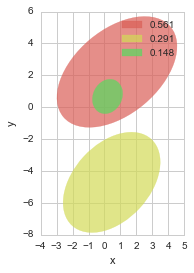

In [48]:
fig,ax = plt.subplots(figsize=(5,4))
plot_gmm_ellipses(gmm,ax=ax)

## 5.2 Goodness-of-fit statistics

In [49]:
gof_df(gmm_pdf_result, kde_result)

,R_square,K_S,Chi_square,MSE,RMSE / Max,RMSE / Mean
0,0.982,0.031,0.153,1.916296e-07,0.015,0.236


In [50]:
X = Y = PLOT_AXIS_RANGE
pdf_Z = generate_Z_from_X_Y(X,Y, mixed_model_pdf)# passing a function as an argument

def residule_between_kde_and_gmm(points):
    kde_vals = exp(kde.score_samples(points))
    gmm_vals = mixed_model_pdf(points)
    return kde_vals - gmm_vals 

residual_Z = generate_Z_from_X_Y(X,Y, residule_between_kde_and_gmm)

plot_3d_prob_density(X,Y,pdf_Z)
plot_3d_prob_density(X,Y,residual_Z)
align_figures()

fig = plt.figure(figsize=(4,3))
plot_2d_prob_density(X,Y,kde_Z,xlabel='x',ylabel='y')
fig_gmm = plt.figure(figsize=(4,3))
plot_2d_prob_density(X,Y,pdf_Z,xlabel='x',ylabel='y')
fig = plt.figure(figsize=(4,3))
plot_2d_prob_density(X,Y,residual_Z,xlabel='x',ylabel='y')
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAUEAAAFBCAYAAADpDh0xAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvXuYHGWZPnxX9bl7ZmKIwKcQDgYQEiUsxM8DGhATBXch
UQgfYAwkWVR2uWQ5E0MMBGJQ3BVFsiiwikE5JByCcloxG/khkZMSICL4EwNLUKOQzPT0sbqqvj96
nnfeevut6qrqqp6umbqvay5Cdx3e7q666znej2KapokYMWLEmKBQx3oBMWLEiDGWiEkwRowYExox
CcaIEWNCIybBGDFiTGjEJBgjRowJjZgEY8SIMaERk2CMGDEmNGISjBEjxoRGTIIxYsSY0IhJMEaM
GBMaMQnGiBFjQiMmwRgxYkxoxCQYI0aMCY2YBGPEiDGhEZNgjBgxJjRiEowRI8aERkyCMWLEmNCI
STBGjBgTGjEJxogRY0IjJsEYMWJMaMQkGCNGjAmNmARjxIgxoRGTYIwYMSY0YhKMESPGhEZMgjFi
xJjQiEkwRgtM04RhGDBNc6yXEiNG6EiO9QJi9BYMw0Cj0UC1WoWiKOz1fD6PRCIxhiuLESMcxCQY
g6FSqaBYLCKbzUJVVZimiUqlAl3XYRgGVFVFMplk/41JMcZ4QEyCMWCaJnRdh6Zp0HUdtVqNkZ5h
GADArMJGowHTNFGr1aCqKhKJREyKMSINxYwDPxMa5P4ahoFarYZyuSzdTlEUJBIJ9qeqo+FkuoRi
UowRRcQkOIHRaDSg6zoAoFaroVQqAQASiQRyuRx0XUe1WpUmSGJSjDFeEJPgBIRpmhYCLJfLqNVq
7P1cLodkMmmJCebzeeY20x8PIkWKGcakGCMqiGOCEwyGYUDTNEZow8PDMAwDiUQCmUzG0R0mEgNG
y2h4Umw0Gmg0GgBGCY/+FEVh5EsxRSLSXC6HVCoVk2KMMUFMghMEvBVHJESEl8lkkM/nGYG5Ae8O
0/FFUiTCBeSkSKSpKArq9brFUkyn05YSnRgxwkJMghMAfPLDNE2USiVomgZFUVAoFJBOpzs+hx9S
5CMxMkuRJ85UKhWTYoxQEJPgOAe5qUQwpVIJhmEgmUyir6/PErsjBBEmtiNFikVS6Q3QrE90cp81
TUO1Wo1JMUYoiElwnEJ0f6vVKiqVCoBmDC6bzboiEdrGNM2OSEdGipVKxVKP2M59jkkxRhiISXAc
ol6vo1gsIpVKIZVKYXh4GI1GA6qqolAoIJVKjfUSWaLFMAxGyKLrHJNijG4gJsFxBl3XUa/XUa/X
YZomyuUyTNNEKpVCoVCQur+EsSQNRVGQTCaRTDYvSbEcxysplstlNBoNpFIpln2OSTGGDDEJjhPw
tX8U0yPCyOfzyGQykSIBr6QoK9ym9xRFYYkWqlFMJpOR+j5ihIeYBMcB+No/wzBY6YuiKOjv72dE
4hYU/+ulOvp2pCgWcBMR8gkYnjjJHY9JMUZMghEH3/lRr9dZ6xsApNNpzwQYFbixFIFmeKBUKkkt
xZgUYwAxCUYWfA0eAJRKJdTrdQDN7C9lgicKRFIkTUSqRxQtxZgUYxBiEowg+No/sfWtr6+PlZ94
xXi6yemzUDugWLgdk2IMQkyCEYJT61s2m0Uul2OlJjGsIAKj8qBOSZG2z2azyGazLEMdI3qISTAi
8NP6FlTnR1DH6ibarbdTUiQyTCQSLP5I75EYREyK0UBMghEAqT4DzVjX8PAwTNN0bH3rBKZpRo70
7OCWiLyQoqIo7LgUhlAUxbZsh2TDYlLsTcQk2MNoNBqo1+vspqtUKqhWqwCcW9+CuNl6rUSm2+BJ
kR4KsuxzvV5nFiFfuM2TIiWsxPksMSn2BmIS7FEYhoFisYhqtYpCoYBarcZa3/r6+kIpfYlvSjmI
1HhSJPKj7DOvpSiqbtP+RKAxKfYWYhLsQfC1fwBY7V86nUY+n3ft/k5kSy5M8GSVyWRaynBEgVm7
UQQ8KdI2MSl2HzEJ9hBE2XuKLQHRbH2bKJBZik6q225IkVzpdDodZ59DRkyCPQK+9s8wDAwPDzMy
zOfzyGazro/V6c0SW5CdwY3AbDtSpOl/QDM0EluK4SEmwTGGU+1fMplkccBuQtd1FItFy00WE6N/
+CFFmY4jbRe7z8EiJsExhFj7Vy6X2QVeKBTY+37hl7go88nvX61WW6yV+KbzBzekSN99vV5Ho9Fo
SbQA9qSYSqXi38cDYhIcI/C1f3zrWzKZRKFQQCKRYOUw3bDCqP4QACNhskxpGJKsgJi3QuKbzh9k
pEjZZ1n9oUxLEYhJ0S9iEuwyxOQHL3vPt74B/mN7XvYTXXAAlrgUueKUBXUqILYbxj4eQQ+mMIiF
f6BkMhnWleJlkh8Qk6JbxCTYRYjuL8neK4qCvr4+W9l7v5Zgu/2o/Y53wckalKFdAbEs2B/HqzpH
EONNgVFSJIFZeshR2dVE/Y1iEuwSeOuPb31zI3sf1np4F7yvr8/TTeC1LMTuxozhHTJS9DKKgK41
8kAo+SIWb08UxCQYMhqNBorFIhKJBNLptKX1rV3tX6fT3WRwUp8R5wB7PZ/fucNx5rkVXr4Tv/NZ
iPzot+ZnPk8kUoxJMERQ32i1WkU6nUa1WoWu655b34IiCZn7y6vPBGmdubFWCJVKJfDMc5gxu27C
z/rdkiK9Vy6XpVY6T4pEnOORFGMSDAEyJWPqF02n0ygUCl25OXnyFN1fykB3C7Ibk+YO22Wee7kc
J0rWqx0pkkcisxSJ6Oi7p4TeeCTFmAQDBp/8AGBReC4UCshkMq6PFcSN7+T+Ou0T9k1O8UTDMJDL
5QDAYq1EJfPca+TsBvR9As2HTTabbbEU6aFN24gPpPFEijEJBgg72Xug2f3hhQB5+CEkulCd3N9e
Qjs9Pze9t+MJ3XTn27nPbqx0GSnS75JKpWwrH3oBMQkGALH2j7e8MpkMCzR7RSc3AFlz9XqdzR7x
83QeK2VpWTkOfcdx5jlcBEmKNOkvn89jy5Yt2GuvvTBz5syx+mhSxCTYIdrJ3qdSKdRqtY5IxOu+
/PkymQzy+bxrYuhFAqEMJlmxbjLPY0XeUYEXS1MkRbejCMgSJFJ86qmn8P73v78tCZqmiSuuuAIv
v/wy0uk0Vq9ejalTp7L3N23ahLVr1yKZTOLkk0/GggULYBgGLr/8cvzpT3+Cqqq48sorcdBBB+H1
11/HZZddBlVVcfDBB2PlypUt5xt/fkQX0Wg02NDzRqOBoaEhaJqGZDKJSZMmIZ1Od5VUqACbnz3c
rSRMN0HucDqdRi6XQ6FQQC6XY50QdJMCzYRUpVJBvV639OTG8A+y0LPZLAqFAiv1ogl8JAdGiZdG
o4H/+Z//QaVScaWG9Oijj6Jer+OOO+7AhRdeiDVr1rD3Go0GrrnmGvzwhz/EunXrcOedd+Ltt9/G
pk2boCgKbr/9dpx33nn41re+BQBYs2YNLrjgAtx2220wDAOPPvpoy/liS9AHnFrf7GTv/cb13IJi
kLqusxqwTjpNokScsnKcdj3PnWaewybTKJX42MVz6R555ZVXcPHFFwMAHnzwQdx///34+Mc/js9+
9rPSz/fss8/iYx/7GABg5syZePHFF9l7f/zjH7H//vujr68PAHDUUUfh6aefxqc+9Skcd9xxAIAd
O3ZgYGAAALBt2zbMmjULADB79mw88cQTmDNnjnX9QX4ZEwGUOSOrolgsolKpQFVV9Pf3SzOvYev7
1Wo1DA4OQtd1ZDIZDAwMtBQ/TyTw2U8qScpmsy2WSqVSQalUQrVahaZpLKTh9VxRRJgkS4RI4YvD
DjsMV111FWbMmIFcLoef//zn+MpXvoI///nP0v2Hh4fR39/P/j+ZTLIEo/heoVBAsVhk573sssuw
evVqnHjiiZb

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAARAAAADZCAYAAADomm/dAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAHFlJREFUeJzt3XtQU2feB/AvSQxUQJFVUdAFi9a1XW9o3e62dVy7VNzZ
drUGpXhZd6mXtsy0ilRU5FIFHGtXZwdttc5sFaVYdWdYO75r9UXxbXUUacURhdYriG1Ki6sRK7ec
94+YYyLkdsjtJN/PjNMkJyfPA9N8eZ5znvM7AYIgCCAikkDh6Q4QkXwxQIhIMgYIEUnGACEiyRgg
RCQZA4SIJFN5ugNE1D2CICAnJwe1tbVQq9XIy8vD4MGDxe1lZWXYsmULVCoVZsyYgcTEROj1emRm
ZuLq1atQKBTIzc3F0KFDcfHiRaxduxZKpRJqtRrr169HeHi41caJSMY+//xzISMjQxAEQTh79qzw
+uuvi9va2tqE+Ph4QafTCa2trcKMGTOEn376STh8+LCwcuVKQRAE4dSpU8Ibb7whCIIgzJkzR6ip
qREEQRBKSkqEgoICq21zBEIkc5WVlXj++ecBAKNHj8b58+fFbZcvX0Z0dDRCQkIAAOPGjUNFRQWm
TJmCyZMnAwAaGhrQq1cvAMDGjRvRt29fAEB7ezsCAwOtts0AIZK5u3fvIjQ0VHyuUqmg1+uhUCg6
bQsODoZOpwMAKBQKZGRk4MiRI/jHP/4BAGJ4fPXVVyguLsauXbusti3bAKmsrPR0F4isGjdunF3v
+/rs/0LfEWZxu1qtxsiRIy1uDwkJQXNzs/jcGB7GbXfv3hW3NTc3i6MNAFi3bh1++uknJCYm4uDB
gwgKCsLBgwexdetWbNu2DX369LHad9kGCAB8mv9/TvssnU5nltTuxvZ9q/2ZK5+3+736jjD0G1xg
cXtj/Qqr+8fFxeHo0aNISEjA2bNn8cQTT4jbYmNjcf36ddy5cwdBQUE4c+YMUlJSUFpaCq1Wi4UL
FyIwMBAKhQIKhQKlpaX49NNPUVRUZBY0lsg6QIgIiI+Px5dffomkpCQAQEFBAT777DP8/PPPSExM
xIoVK/C3v/0NgiBAo9Ggf//+ePHFF7FixQrMmTMH7e3tWLVqFVQqFfLz8xEZGYk333wTAQEBmDBh
AlJTUy22zQAhkrmAgADk5uaavTZkyBDx8aRJkzBp0iSz7Y899hg2bdrU6bNOnTrlUNtcSEZEkjFA
iEgyBggRScYAISLJGCBEJBkDhIgkY4AQkWQMECKSjAFCRJIxQIhIMgYIEUnGACEiyTwWIFVVVZg7
dy4AoK6uDsnJyZgzZ06ni4KIyHt5JEC2b9+OzMxMtLW1ATBcfrx06VLs2rULer0eR44c8US3iGRJ
EARkZ2cjKSkJ8+bNQ319vdn2srIyaDQaJCUlYe/evQAM5QrfeecdzJ49GzNnzkRZWRkAoKamBrNm
zcLs2bOxatUqm217JECio6OxefNm8Xl1dTXGjx8PAJg4cSJOnjzpiW4RydKRI0fQ2tqKkpISpKWl
oaDgYXGi9vZ2rFu3Dh9//DGKioqwZ88eNDU14d///jf69OmD3bt346OPPsKaNWsAAIWFhUhNTcXu
3bvR0tKCY8eOWW3bI/VA4uPj0dDQID4XBEF8bFqzkYhsk1JUeerUqUhISABgKIGoUhmiYMSIEbh1
6xYEQUBzc7P4uiVeUVDIWL8R6Fyz0RpnB42ng4vt+3f7UkkpqvzYY4+J+7711ltYsmQJACAmJgbv
vvsuPvzwQ4SGhmLChAlW2/aKAHnyySdRUVGBp59+GsePH8czzzxj137OrGHpazU52b682tf+fMXi
NlvHGaQWVf7uu++QmpqKOXPm4I9//CMAIC8vD8XFxYiNjcXu3buxbt06ZGVlWWzbKwJk+fLlWL16
Ndra2hAbGysOrYj8Ra1+isVtI2zs60hR5YqKCqSkpODHH39ESkoKsrKyzP5gh4WFidOdiIgIfP31
11bb9liAREVFoaSkBIBh2FRUVOSprhDJmiNFlRMTE9G/f3/k5eXhzp072LJlCzZv3oyAgABs374d
a9aswdtvvw2VSgW1Wi0eXLUkQDA9gikjlZWVvK0D2/fa9meufN7u+8JUVlbiYvg+i9tHNGns/ix3
40pUIpKMAUJEkjFAiEgyBggRScYAISLJGCBEJBkDhIgkY4AQkWQMECKSjAFCRJIxQIhIMgYIEUnG
ACEiyRggRDLnzKLKRgcOHBDLA1jjFQWFiEg606LKVVVVKCgowJYtWwA8LKr8r3/9C4GBgXj11Vfx
wgsv4NixY+jTpw/Wr1+P27dvY9q0aZg8eTIA4MKFC9i/f79dbXMEQiRz9hZV7tGjh1lR5bfeeguA
eVHlW7duYdOmTXbd0gHgCIRI9pxVVFmv1yMzMxMZGRlQq9Wwp9YYA4TIC3yra7C4zVZNVGcVVT53
7hzq6uqQk5ODlpYWXL58GQUFBVixYoXFthkgRF7gdttvJe/rrKLKo0aNwoEDBwAADQ0NSEtLsxoe
AAOESPacWVRZrVY71DaLKj/ga0V92b5n23e0qHIRTlvcPhcTWFSZiHwPpzBkUe2dFrveN7xXoIt7
Qt7KqwLklVdeEe+KNWjQIOTn53u4R/7LGB6P/3qQ1fddOX8DtXdaGCJ+ymsCpLW1FQCwc+dOD/eE
7A0P0/fUnr8BgKMRf+M1x0Bqampw7949pKSkYP78+aiqqvJ0l/ySI+FhSgySOy12T31I/rxmBBIU
FISUlBQkJibi2rVrWLBgAQ4dOiQuiCHXkxoeRsb9jNMaI45KfJfXBEhMTAyio6PFx2FhYWhsbERE
RITFfXQ6nVP74OzPk0v7de0KGAaj7Rj4+C+63Y9+0b3Fx99d+QnVt9rF579U6S3u56+/fznzmgDZ
v38/vvnmG2RnZ0Or1aK5uRn9+vWzuo8zz9v72joEexhHCSql4UvvivZDRz/8zCvnb+Cm0PWIxB9/
/77Aa+YHGo0GOp0OycnJSEtLQ35+PqcvLmQ6XZE6ZXGU6XES8g1eMwLp0aMHNmzY4Olu+LzuHufo
rsd/PYinfn0I/8T7CdOzI54KDyOORHwHA8QPeGK6YgtDxDd4zRSGXMNbRh1dMV2EFhng4c6QJAwQ
H9bd8Ki61yQ+Ht0z3Cl9IucTBAE5OTmora2FWq1GXl4eBg8eLG4vKyvDli1boFKpMGPGDCQmJqK9
vR0rV65EQ0MD2trasHjxYkyePBl1dXXIyMiAQqHAsGHDkJ2dbbVtBoiPcjQ8vsV9KO+1mb02dKhh
Dc6lS1qGiRdzZlHlgoICLF26FOPHj0d2djaOHDmCP/zhDxbbZoD4MHvCwxgMkZGhFtdBGIMEYJh4
I3uLKgMwK6qckJAAwLyocnV1NcaPHw8AmDhxIk6cOMEA8Te1d1ocCo+hQyPsXoXZVZgwRDzLWUWV
AZgVUja+1xoGiI+REh5SGfetuqQFwNFId1xo0lreaOPX6qyiygCgVCq7fK8lPI3rQ+w5JVp1rwlV
95owdGhEt8LDlBgkDz6bHBeuH27xny1xcXEoLy8HAKtFlVtbW1FRUYExY8aIRZXT09Mxffp08f0j
RoxARUUFAOD48eM2SylyBOJjrI0+LI06zrY2ol3ZAVXr/S73G6O2fk2S6WdeumTlLym5hDOLKi9f
vhyrV69GW1sbYmNjxeMklrCo8gOevpiqu+3bM3UxjjxMnW1tBABEhj2GkC7a/6b+BwD2hQjwMEDs
nc5ceVCIKDKgVda//0c5WlT5vR+/sbg9ve8TLKpMrmPv1MVSeDwxuL/F/YzbjO+1Rcq0iNfEyBen
MD7CnqmLKXvCw0gMEQdHI+T7OAKROVtTl66OezwaHueEm/g26L84J9zEOeGmxc9yZDRiz8FU4/SF
5IsBImP2Xoh

In [51]:
def f(V,theta):
    return (mixed_model_pdf([[V*cos(theta),V*sin(theta)]]))*V

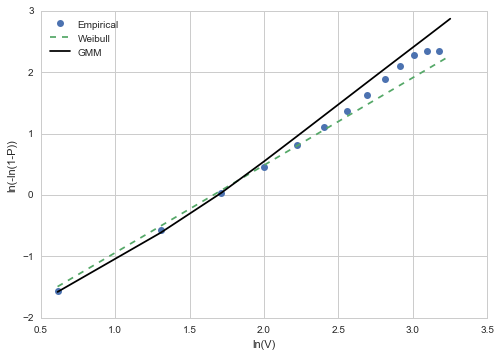

In [52]:
x = linspace(0, max_speed, 15)

# 1. Plot v-p points, empirical distribution
ecdf = sm.distributions.ECDF(df.speed)
y = ecdf(x)
plot(log(x), log(-log(1-y)),'o', label = 'Empirical')

# 2. Weibull distribution
weibull_params = sp.stats.exponweib.fit(df.speed, floc=0, f0=1)
y_cdf_weibull = sp.stats.exponweib.cdf(x, *weibull_params)
plot(log(x), log(-log(1-y_cdf_weibull)),'--', label = 'Weibull')

# 3. GMM distribution
y_ = [integrate.nquad(f, [[0, x_val],[0, 2*pi]]) for x_val in x]
y = array(zip(*y_)[0])
plot(log(x), log(-log(1-y)),'-', color='black', label = 'GMM')

plt_configure(xlabel='ln(V)',ylabel='ln(-ln(1-P))',legend={'loc':'best'})

Direction Distribution Comparison


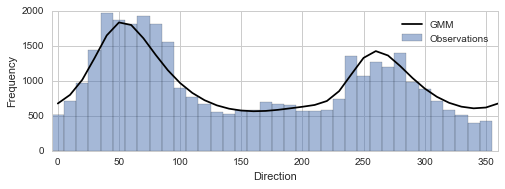

In [53]:
# Calculate Angle Distribution
x = linspace(0,2*pi, num=36+1)
y_ =[integrate.nquad(f, [[0, inf],[x_-pi/36, x_+pi/36]]) for x_ in x]

# 1. integrate.nquad returns 2 vaule, result, abserr. Need to abstract the first to plot
# 2. * length of data size, to adjust the plot space
y = array(zip(*y_)[0])*len(df['dir']) 

df['dir'].hist(bins=DIR_BIN, alpha=0.5, label='Observations')
plot(x/pi*180, y,'-', color='black', label='GMM')
title='Direction Distribution Comparison'
plt_configure(xlabel='Direction',ylabel='Frequency', legend={'loc': 'best'} ,tight='xtight',figsize = (8,2.5))
dir_fig = plt.gcf()
print title

Speed Distribution Comparison


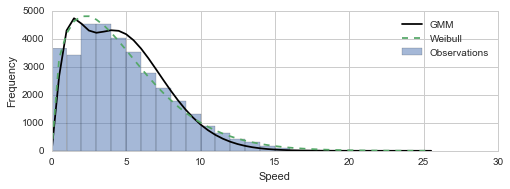

In [54]:
# Calculate Speed Distribution
# 1. GMM Model
x = arange(0, max_speed, 0.5)
y_ =[integrate.nquad(f, [[x_-0.01, x_+0.01],[0, 2*pi]]) for x_ in x]
y = array(zip(*y_)[0])*len(df.speed)/0.02
plot(x, y,'-', color='black', label='GMM')

# 2. Observation
df['speed'].hist(bins=arange(0, df.speed.max()), alpha=0.5, label='Observations')

# 3. Weibull
y_weibul = sp.stats.exponweib.pdf(x, *weibull_params)* len(df.speed)
plot(x, y_weibul, '--', label='Weibull')   
title='Speed Distribution Comparison'
plt_configure(xlabel='Speed',ylabel='Frequency',legend=True, figsize=(8, 2.5))
plt.gca().set_ylim(bottom = 0)
plt.locator_params(axis='y', nbins=5)
print title

## 5.3 Sectoral Comaprison

In [55]:
# Calculate Speed Distribution
def model_data_comparison(df, original_incre = 10, incre = 10):
    start, end = -original_incre/2 + incre/2, 360
    max_diff_array = []
    curve_collection = []
    max_speed = df.speed.max()
    
    # Find a max count for plotting histogram
    max_count = max_count_for_angles(df, start, end, incre)
    plot_range = [0, max_speed, 0, max_count*1.05]
    
    for angle in arange(start, end, incre):
        angle_radian, incre_radian = radians(angle), radians(incre)  
        start_angle, end_angle = angle-incre/2, angle+incre/2
        
        # Select data from observation
        sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)
        data_size = len(sub_df.speed)
        direction_prob = integrate.nquad(f, [[0, inf],
                                             [angle_radian-incre_radian/2, angle_radian+incre_radian/2]])
        weibull_params = sp.stats.exponweib.fit(sub_df.speed, floc=0, f0=1)
        
        fig = plt.figure(figsize=(13,1.6))
        x = linspace(0, sub_max_speed, 20)
        # 1. Frequency Comparison
        ax1 = fig.add_subplot(1,3,1)        
        # 1.1. Data Histogram
        sub_df['speed'].hist(bins=arange(0, sub_df.speed.max()), alpha=0.5, label='Data')             
        # 1.2. Model Distribution
        y_gmm_ =[integrate.nquad(f, [[x_-0.01, x_+0.01], 
                                     [angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
                                 for x_ in x]
        y_gmm = array(zip(*y_gmm_)[0])/direction_prob[0]/0.02
        plot(x, y_gmm*data_size,'-', color='black', label='GMM')
        # 1.3 Weibull Distribution
        y_weibull = sp.stats.exponweib.pdf(x, *weibull_params)
        plot(x, y_weibull*data_size, '--', color='black',label='Weibull')   
        plt_configure(xlabel = "V", ylabel='Frequency')
        if angle == start: plt.legend() 
        plt.axis(plot_range)
        
        # 2. CDF Comaprison
        ax2 = fig.add_subplot(1,3,2)
        # 2.1. Empirical distribution
        ecdf = sm.distributions.ECDF(sub_df.speed)
        y_ecdf = ecdf(x)
        # 2.2. Model
        y_ =[integrate.nquad(f, [[0, x_val],[angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
             for x_val in x]
        y_cdf_gmm = array(zip(*y_)[0])/direction_prob[0]
        # 2.3 Weibull
        y_cdf_weibull = sp.stats.exponweib.cdf(x, *weibull_params)
        plot(x, y_ecdf,'o', alpha=0.8, label='Data')
        plot(x, y_cdf_gmm,'-', color='black',label='GMM')
        plot(x, y_cdf_weibull,'--', color='black',label='Weibull')
        plt.gca().set_xlim(right = max_speed)
        plt_configure(xlabel = "V", ylabel='P')
        if angle == start: plt.legend() 
        
        # 3. Weibull Comparison
        ax3 = fig.add_subplot(1,3,3)
        plot(log(x), log(-log(1-y_ecdf)),'o', alpha=0.8, label='Data')
        plot(log(x), log(-log(1-y_cdf_gmm)),'-', color='black', label='GMM')
        plot(log(x), log(-log(1-y_cdf_weibull)),'--',color='black',label='Weibull')
        plt_configure(xlabel="ln(V)", ylabel="ln(-ln(1-P)")
        plt.gca().set_xlim(right = log(max_speed+1))
#         plt.locator_params(nbins=5)
        if angle == start: plt.legend(loc='best') 
        
        title = '%s (%s - %s) Degree' % (angle, start_angle, end_angle)
        plt.suptitle(title,y=1)
        
        diff = abs(y_ecdf - y_cdf_gmm)
        diff_weibull = abs(y_ecdf - y_cdf_weibull)
        max_diff_array.append([len(sub_df), angle, diff.max(), x[diff.argmax()], 
                               diff_weibull.max(), x[diff_weibull.argmax()]])
        curves = {'angle': angle, 'data_size': data_size, 'weight': direction_prob[0], 
                  'x': x, 'gmm_pdf': y_gmm, 'gmm_cdf': y_cdf_gmm,
                  'weibull_pdf': y_weibull, 'weibull_cdf': y_cdf_weibull, 'ecdf': y_ecdf}
        curve_collection.append(curves)
        
        plt.show()
        print 'data size:', len(sub_df)
        print 'max diff:', diff.max(), ', speed value:', x[diff.argmax()], 'y gmm', y_cdf_gmm[diff.argmax()]
    return max_diff_array, curve_collection

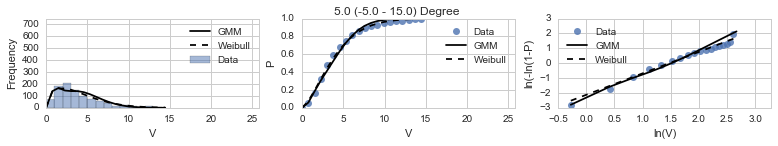

data size: 970
max diff: 0.0659113297403 , speed value: 3.79880150658 y gmm 0.526872175414


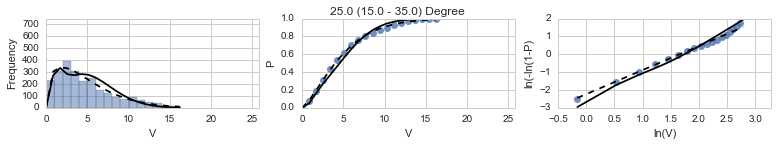

data size: 2420
max diff: 0.0665917151663 , speed value: 4.26604038259 y gmm 0.466466136073


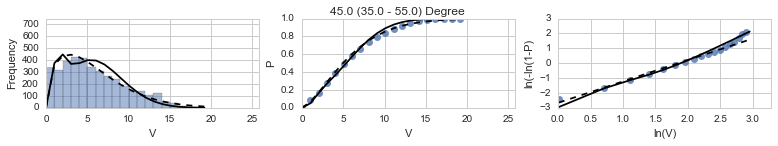

data size: 3849
max diff: 0.0533732914476 , speed value: 11.1098205835 y gmm 0.932302883549


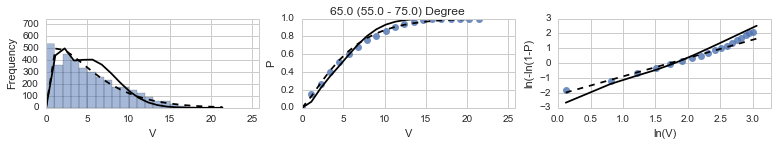

data size: 3748
max diff: 0.0863928773023 , speed value: 1.12513851687 y gmm 0.0678227043412


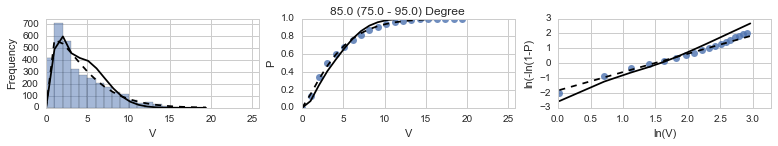

data size: 3380
max diff: 0.0926834521459 , speed value: 3.05854968622 y gmm 0.410275127736


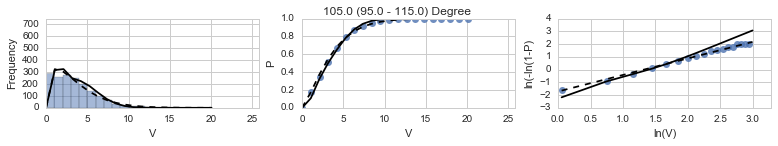

data size: 1662
max diff: 0.0711287184859 , speed value: 1.05535429443 y gmm 0.106969957808


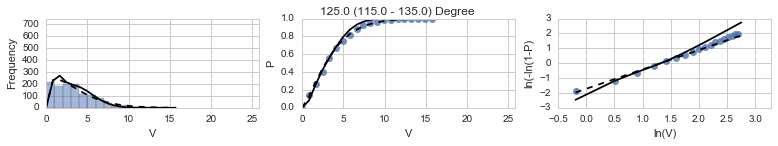

data size: 1215
max diff: 0.0648093660902 , speed value: 0.826305952319 y gmm 0.081692691523


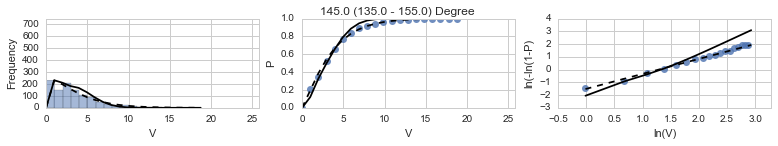

data size: 1103
max diff: 0.086487155273 , speed value: 0.985954291984 y gmm 0.120221820248


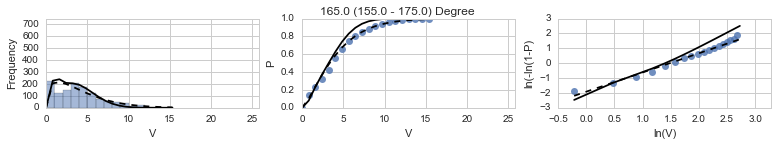

data size: 1286
max diff: 0.0943443561102 , speed value: 7.25698877554 y gmm 0.941156175706


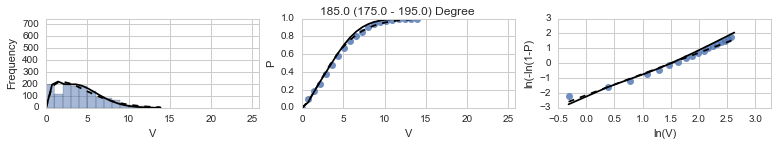

data size: 1330
max diff: 0.0518262951375 , speed value: 6.57133530913 y gmm 0.854833813934


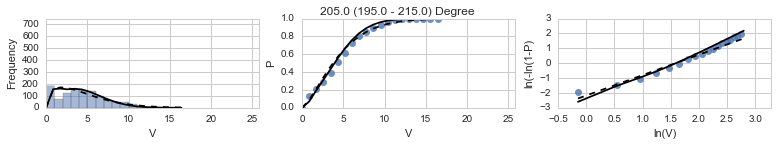

data size: 1137
max diff: 0.0645868828557 , speed value: 0.863607670307 y gmm 0.0717367758954


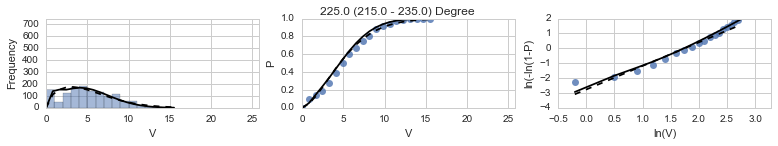

data size: 1323
max diff: 0.0555722881758 , speed value: 3.26482659876 y gmm 0.334483852802


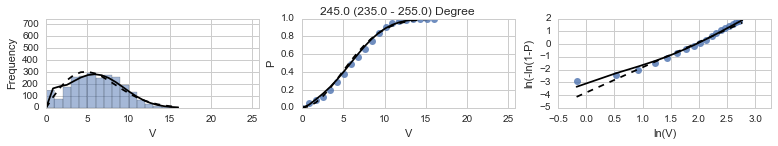

data size: 2430
max diff: 0.0363819129404 , speed value: 2.52659840849 y gmm 0.159015657796


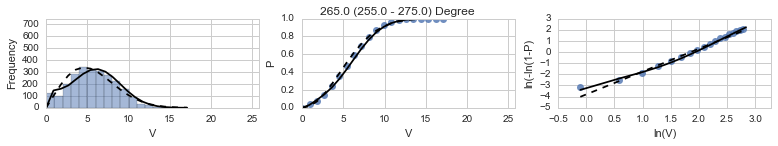

data size: 2482
max diff: 0.0412318128974 , speed value: 5.39757044708 y gmm 0.431370926829


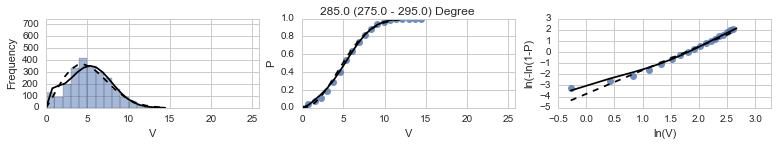

data size: 2391
max diff: 0.0375826184435 , speed value: 2.27798378843 y gmm 0.148833141237


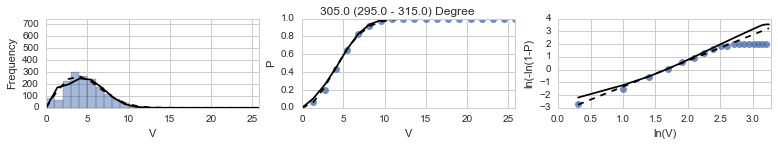

data size: 1601
max diff: 0.0589396228905 , speed value: 2.72116139417 y gmm 0.255067043253


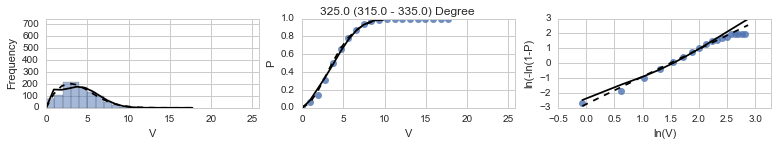

data size: 1108
max diff: 0.0673929805831 , speed value: 1.86653706654 y gmm 0.210894785637


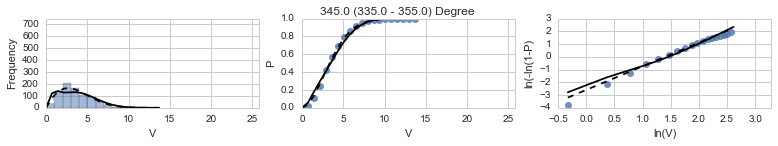

data size: 824
max diff: 0.0654493329402 , speed value: 1.44199384958 y gmm 0.180740595076


In [56]:
if len(effective_column) == 16:
    rebinned_angle = 22.5
else: 
    rebinned_angle = 20
max_diff_array, curve_collection = model_data_comparison(df, SECTOR_LENGTH, rebinned_angle)

In [57]:
diff_df = pd.DataFrame(max_diff_array,columns=['datasize','direction', 'gmm', 'speed_gmm',
                                               'weibull', 'speed_weibull'])
def nominal_avg_and_weight_avg(df_weight, df_value):
    return np.average(df_value), np.sum(df_weight / df_weight.sum() * df_value)

_, gmm_mean = nominal_avg_and_weight_avg(diff_df.datasize, diff_df.gmm)
_, weibull_mean = nominal_avg_and_weight_avg(diff_df.datasize, diff_df.weibull)

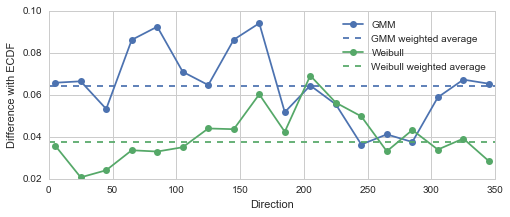

In [58]:
line, = plot(diff_df.direction, diff_df.gmm, '-', label = 'GMM', marker='o')
plt.axhline(gmm_mean, linestyle='--', color = line.get_color(), label ='GMM weighted average')
line,= plot(diff_df.direction, diff_df.weibull, '-', label = 'Weibull', marker='o')
plt.axhline(weibull_mean, linestyle='--', color = line.get_color(), label ='Weibull weighted average')
plt_configure(xlabel='Direction', ylabel='Difference with ECDF', 
              legend={'loc':'best'},figsize=(8,3))
plt.locator_params(axis='y', nbins=5)

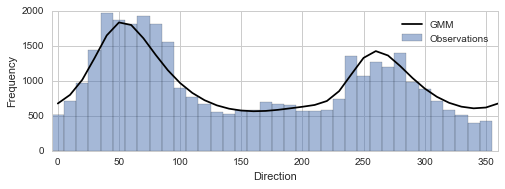

In [59]:
# Compare direction weight with previous figure
display(dir_fig)
# diff_df

### 5.3.1 Data Variability, by Bootstrap (Resampling)

In [60]:
FRACTION = 0.5 

In [61]:
max_diff_element = max(max_diff_array, key=lambda x: x[2])
angle =  max_diff_angle = max_diff_element[1]
incre = rebinned_angle

# Select data from observation
start_angle, end_angle = angle-incre/2, angle+incre/2
angle_radian, incre_radian = radians(angle), radians(incre)  
sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)
weibull_params = sp.stats.exponweib.fit(sub_df.speed, floc=0, f0=1)

165.0 (155.0 - 175.0) Degree Speed Distribution
0.0933041144128 3.0 0.466554503215


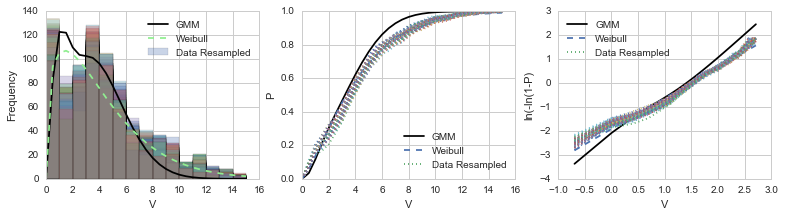

In [62]:
fig = plt.figure(figsize=(13,3))
ax1 = fig.add_subplot(1,3,1)   
ax2 = fig.add_subplot(1,3,2)   
ax3 = fig.add_subplot(1,3,3)   

x = arange(0, sub_max_speed, 0.5)

# 1. GMM
y_gmm_ =[integrate.nquad(f, [[x_-0.01, x_+0.01], [angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
          for x_ in x]
direction_prob = integrate.nquad(f, [[0, inf], [angle_radian-incre_radian/2, angle_radian+incre_radian/2]])
y_gmm = array(zip(*y_gmm_)[0])/direction_prob[0]/0.02 *len(sub_df.speed)*FRACTION
y_gmm_cdf_ =[integrate.nquad(f, [[0, x_val],[angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) for x_val in x]
y_gmm_cdf = array(zip(*y_gmm_cdf_)[0])/direction_prob[0]
ax1.plot(x, y_gmm,'-', color='black', label='GMM')
ax2.plot(x, y_gmm_cdf,'-', color = 'black', label='GMM')
ax3.plot(log(x), log(-log(1-y_gmm_cdf)),'-', color = 'black',label='GMM')

# 2. Weilbull 
y_weibull = sp.stats.exponweib.pdf(x, *weibull_params)*len(sub_df.speed)*FRACTION
y_weibull_cdf = sp.stats.exponweib.cdf(x, *weibull_params)
ax1.plot(x, y_weibull,'--',color='lightgreen',label='Weibull')
ax2.plot(x, y_weibull_cdf,'--',label='Weibull')
ax3.plot(log(x), log(-log(1-y_weibull_cdf)),'--',label='Weibull')

# 3. Data Resampled
for i in xrange(1,100):
    sub_df_resampled = sub_df.sample(frac=FRACTION, replace=True)
    sub_df_resampled['speed'].hist(ax=ax1, bins=arange(0, sub_max_speed), 
                                   alpha=0.3, label='Data Resampled')
    ecdf = sm.distributions.ECDF(sub_df_resampled.speed)
    y_ecdf = ecdf(x) 
    ax2.plot(x, y_ecdf,':', label='Data Resampled')
    ax3.plot(log(x), log(-log(1-y_ecdf)),':', label='Data Resampled')
    if i == 1: 
        plt_configure(ax=ax1, xlabel='V',ylabel='Frequency',legend={'loc':'best'})
        plt_configure(ax=ax2, xlabel='V',ylabel='P',legend={'loc':'best'})
        plt_configure(ax=ax3, xlabel='V',ylabel='ln(-ln(1-P)',legend={'loc':'best'})

print '%s (%s - %s) Degree Speed Distribution' % (angle, start_angle, end_angle)
ax1.set_ylim(bottom = 0)

diff = abs(y_ecdf - y_gmm_cdf)
print diff.max(), x[diff.argmax()], y_gmm_cdf[diff.argmax()]

### 5.3.2 Time Variability

165.0 (155.0 - 175.0) Degree Speed Distribution


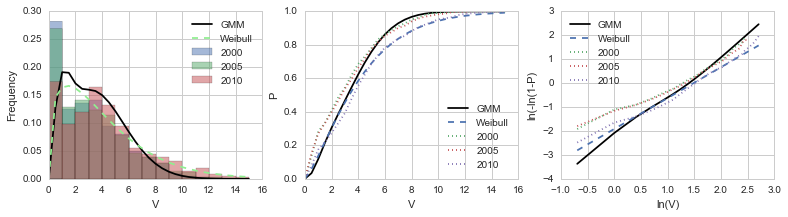

In [63]:
fig = plt.figure(figsize=(13,3))
ax1 = fig.add_subplot(1,3,1)   
ax2 = fig.add_subplot(1,3,2)   
ax3 = fig.add_subplot(1,3,3)   

x = arange(0, sub_max_speed, 0.5)

# 1. GMM
direction_prob = integrate.nquad(f, [[0, inf], [angle_radian-incre_radian/2, angle_radian+incre_radian/2]])
y_gmm_ =[integrate.nquad(f, [[x_-0.01, x_+0.01], [angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
          for x_ in x]
y_gmm = array(zip(*y_gmm_)[0])/direction_prob[0]/0.02
y_gmm_cdf_ =[integrate.nquad(f, [[0, x_val],
                         [angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) for x_val in x]
y_gmm_cdf = array(zip(*y_gmm_cdf_)[0])/direction_prob[0]

ax1.plot(x, y_gmm,'-', color='black', label='GMM')
ax2.plot(x, y_gmm_cdf,'-', color='black', label = 'GMM')
ax3.plot(log(x), log(-log(1-y_gmm_cdf)),'-', color='black',label='GMM')

# 2. Weibull
y_weibull = sp.stats.exponweib.pdf(x, *weibull_params)
y_weibull_cdf = sp.stats.exponweib.cdf(x, *weibull_params)
ax1.plot(x, y_weibull,'--', color='lightgreen', label='Weibull')
ax2.plot(x, y_weibull_cdf,'--', label='Weibull')
ax3.plot(log(x), log(-log(1-y_weibull_cdf)), '--', label='Weibull')

# 3. Data
for start_time in xrange(20000000, 20150000, 50000):
    end_time = start_time + 50000 
    df_other_years = df_all_years.query('(date >= @start_time) & (date < @end_time)')
    df_other_years_at_angle, _ = select_df_by_angle(df_other_years, start_angle, end_angle)
    if len(df_other_years) > 0 :
        df_other_years_at_angle['speed'].hist(ax=ax1, bins=arange(0, sub_max_speed), 
                                              normed=True,alpha=0.5, label=str(start_time//10000))
        ecdf = sm.distributions.ECDF(df_other_years_at_angle.speed)
        y_ecdf = ecdf(x)
        
        ax2.plot(x, y_ecdf,':', label = start_time//10000)
        ax3.plot(log(x), log(-log(1-y_ecdf)),':', label = start_time//10000)

print '%s (%s - %s) Degree Speed Distribution' % (angle, start_angle, end_angle)
ax1.set_ylim(bottom = 0)
plt_configure(ax=ax1, xlabel='V',ylabel='Frequency',legend=True)
plt_configure(ax=ax2, xlabel='V',ylabel='P',legend={'loc':'best'})
plt_configure(ax=ax3, xlabel="ln(V)", ylabel="ln(-ln(1-P)",legend={'loc':'best'})

### 5.3.3 Adjacent Sector Variability

165.0


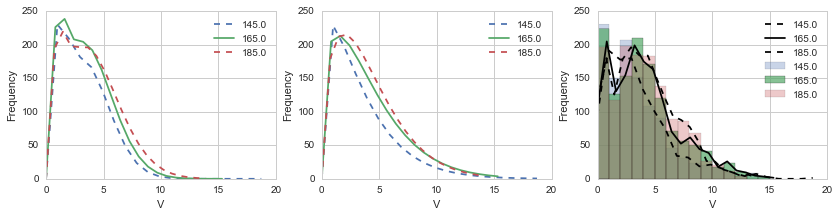

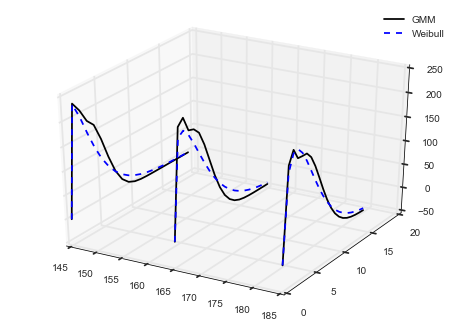

In [64]:
incre = rebinned_angle
angle_group = [max_diff_angle-incre, max_diff_angle, max_diff_angle+incre]

fig = plt.figure(figsize=(14,3))
ax1 = fig.add_subplot(1,3,1)   
ax2 = fig.add_subplot(1,3,2)   
ax3 = fig.add_subplot(1,3,3)   
fig4 = plt.figure()
ax4 = fig4.gca(projection='3d')
legend_3d = False

for curves in curve_collection:
    if curves['angle'] in angle_group:
        angle, data_size, x = curves['angle'], curves['data_size'], curves['x']
        y_gmm, y_cdf_gmm =  curves['gmm_pdf'], curves['gmm_cdf'], 
        y_weibull, y_cdf_weibull, y_cdf = curves['weibull_pdf'],  curves['weibull_cdf'], curves['ecdf']
        
        linestyle = '-' if angle == max_diff_angle else '--'
        alpha = 0.7 if angle == max_diff_angle else 0.3
        
   
        ax1.plot(x, y_gmm*data_size, linestyle, label=angle)        
        ax2.plot(x, y_weibull*data_size, linestyle, label=angle)
        
        start_angle, end_angle = angle-incre/2, angle+incre/2
        sub_df, max_speed = select_df_by_angle(df, start_angle, end_angle)
        sub_df['speed'].hist(ax=ax3,figure=fig, bins=arange(0, max_speed), alpha=alpha, label=str(angle))
        
        sample = array(sub_df['speed']).reshape(-1, 1)
        kde = neighbors.KernelDensity(bandwidth= 0.3).fit(sample) 
        y_kde = [exp(kde.score_samples(x_val))for x_val in x]
        ax3.plot(x, np.dot(y_kde,data_size), linestyle, label=angle, color='black')
        
        xs,ys,zs = curves['angle']*np.ones_like(curves['x']), curves['x'], curves['gmm_pdf']*curves['data_size']
        ax4.plot(xs,ys,zs, color='black', label='GMM')
        xs, ys, zs = xs, curves['x'], curves['weibull_pdf']*curves['data_size']
        ax4.plot(xs,ys,zs, color='blue', linestyle='--',label='Weibull')
        if legend_3d == False:
            ax4.legend()
            legend_3d = True
        
for ax in [ax1, ax2, ax3]:
    plt_configure(ax=ax, xlabel='V',ylabel='Frequency',legend={'loc':'best'})
    

ylim = max(ax1.get_ylim()[1],ax2.get_ylim()[1])
ax1.set_ylim(bottom = 0, top=ylim)
ax2.set_ylim(bottom = 0, top=ylim)
print max_diff_angle

# 6. Result Variability & Cross-Validation

In [65]:
from sklearn.cross_validation import train_test_split, KFold

if 'bandwidth' not in globals():
    bandwidth = DEFAULT_BANDWDITH    
if 'FIT_METHOD' not in globals():
    FIT_METHOD = 'square_error'       
if 'KDE_KERNEL' not in globals():
    KDE_KERNEL = 'gaussian'
    
points = FITTING_RANGE
    
def fit_gmm(df, fit_method, number_of_gaussian = 3, ):
    # 1. Create Input, speed_set
    sample = sub_speed_set = array(zip(df.x, df.y))
    points = FITTING_RANGE
    
    # 2. KDE + EM fitting
    kde = neighbors.KernelDensity(bandwidth=bandwidth, kernel = KDE_KERNEL).fit(sample) 
    kde_result = exp(kde.score_samples(points))
    
    clf = mixture.GMM(n_components=number_of_gaussian, covariance_type='full')
    clf.fit(sample)
    gmm_em_result = read_gmm_em_result(clf)
        
    # 3. GMM fitting
    x0 = gmm_em_result
    bonds = [(0., 0.99),(-fit_limit, fit_limit),
             (-fit_limit, fit_limit),(0., fit_limit),(0., fit_limit),(-0.99, 0.99)]*int(len(x0)/6)
    cons = [{'type': 'eq', 'fun': lambda x: sum(x[::6]) - 1},
#             {'type': 'ineq', 'fun': lambda x: width_height_ratios_set(x) - 1/3},
#             {'type': 'ineq', 'fun': lambda x: 3 - width_height_ratios_set(x)},
           ]
 
    result = sp.optimize.minimize(
        lambda x0: GMM_fit_score(x0, kde_result, points, method=fit_method),
        x0,
        bounds = bonds,
        constraints = cons,
        tol = 0.000000000001,
        options = {"maxiter": 500})  
    
    # 4. Returns
    gmm = group_gmm_param_from_gmm_param_array(result.x)  
    mixed_model_pdf = generate_gmm_pdf_from_grouped_gmm_param(gmm)
    gmm_pdf_result = mixed_model_pdf(points)
    
    return {
        'gmm' : gmm,
        'kde_clf': kde,
        'kde_result': kde_result,
        'gmm_pdf_result': gmm_pdf_result,
        'number_of_iteration': result.nit,
    }

## 6.1 Variability of the Result

,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.577,0.864,2.160,3.763,3.482,0.465
2,0.277,0.355,-4.909,3.053,2.986,0.414
3,0.146,0.206,0.662,0.950,1.080,0.185


GMM Plot Result
0.577197925324 [[ 0.8643642   2.16029617]] [ 2.63859587  4.3958476 ] -49.7325675968
0.276554438743 [[ 0.35478388 -4.9086007 ]] [ 2.31111117  3.59165895] -46.5282983609
0.146247635934 [[ 0.20624204  0.66201714]] [ 0.89600198  1.1249972 ] 152.382367159


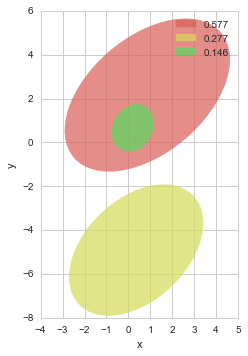

,R_square,K_S,Chi_square,MSE,RMSE / Max,RMSE / Mean
0,0.982,0.030,0.194,1.914044e-07,0.015,0.236


,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.572,0.766,2.135,3.719,3.529,0.456
2,0.278,0.522,-4.813,3.018,3.136,0.391
3,0.150,0.184,0.670,0.923,1.087,0.159


GMM Plot Result
0.572128172885 [[ 0.7664964   2.13510834]] [ 2.66716642  4.37813318] -48.2727333609
0.277709664523 [[ 0.52164335 -4.81327728]] [ 2.39804835  3.63152784] 137.802162134
0.150162162592 [[ 0.18368835  0.67040578]] [ 0.88724298  1.11592322] 158.025652057


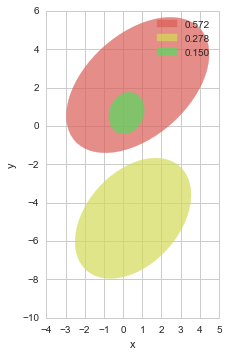

,R_square,K_S,Chi_square,MSE,RMSE / Max,RMSE / Mean
0,0.983,0.031,0.156,1.869584e-07,0.014,0.234


,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.574,0.764,2.149,3.719,3.488,0.453
2,0.275,0.420,-4.931,3.051,2.926,0.384
3,0.150,0.177,0.636,0.928,1.060,0.162


GMM Plot Result
0.574103034939 [[ 0.76397411  2.14926899]] [ 2.65859633  4.35037438] -49.0433637523
0.275437472175 [[ 0.4196758 -4.9313135]] [ 2.34186441  3.51950161] -48.1205516872
0.150459492887 [[ 0.17698496  0.635538  ]] [ 0.88706832  1.09507842] 154.722635516


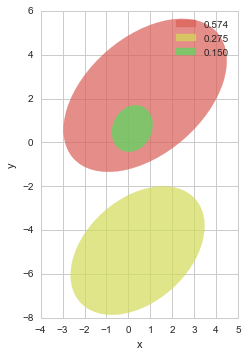

,R_square,K_S,Chi_square,MSE,RMSE / Max,RMSE / Mean
0,0.983,0.032,0.292,1.879785e-07,0.014,0.234


,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.538,0.774,2.351,3.879,3.518,0.490
2,0.304,0.541,-4.513,2.949,3.211,0.402
3,0.157,0.187,0.679,0.949,1.090,0.172


GMM Plot Result
0.538125517321 [[ 0.77380964  2.35054999]] [ 2.62507201  4.53184448] -50.6451087589
0.304419694581 [[ 0.5414895  -4.51308956]] [ 2.3698863   3.65986214] 140.993288031
0.157454788098 [[ 0.18718758  0.67940996]] [ 0.90310978  1.12808733] 154.486953252


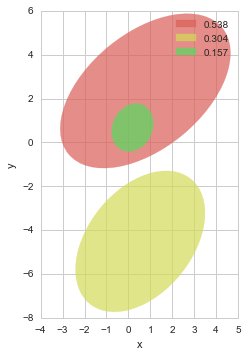

,R_square,K_S,Chi_square,MSE,RMSE / Max,RMSE / Mean
0,0.983,0.027,0.128,1.837713e-07,0.014,0.231


,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.558,0.771,2.188,3.736,3.448,0.456
2,0.297,0.463,-4.655,3.072,3.239,0.448
3,0.145,0.192,0.646,0.943,1.051,0.170


GMM Plot Result
0.55809021176 [[ 0.77113205  2.18752224]] [ 2.63779235  4.34595907] -49.9990273318
0.296860607089 [[ 0.46327749 -4.65510879]] [ 2.34068378  3.80073724] 138.369456068
0.145049181151 [[ 0.19208452  0.64617203]] [ 0.8927281  1.0941303] 151.431673287


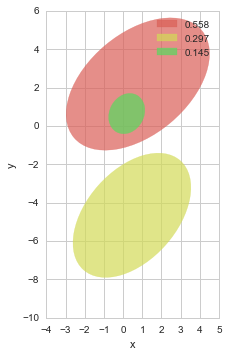

,R_square,K_S,Chi_square,MSE,RMSE / Max,RMSE / Mean
0,0.981,0.032,0.146,2.020314e-07,0.015,0.243


,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.593,0.861,2.099,3.627,3.526,0.431
2,0.265,0.308,-4.957,3.096,2.934,0.383
3,0.142,0.181,0.649,0.909,1.049,0.145


GMM Plot Result
0.592887505929 [[ 0.86083936  2.09907264]] [ 2.69567505  4.28017345] -46.8687204867
0.265011083119 [[ 0.30773744 -4.95695756]] [ 2.36259193  3.55180203] -48.9894837416
0.142101410952 [[ 0.18107834  0.64919406]] [ 0.87652948  1.07648346] 157.421267779


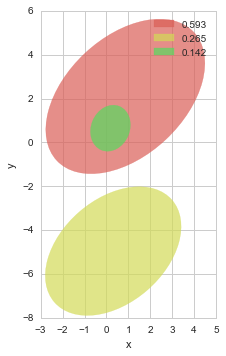

,R_square,K_S,Chi_square,MSE,RMSE / Max,RMSE / Mean
0,0.981,0.031,0.116,2.006552e-07,0.015,0.242


,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.601,0.725,2.008,3.710,3.596,0.450
2,0.260,0.387,-5.058,3.055,2.931,0.395
3,0.140,0.194,0.656,0.930,1.039,0.157


GMM Plot Result
0.600806114343 [[ 0.7246835   2.00795118]] [ 2.70826208  4.3996765 ] -46.979120259
0.259618418288 [[ 0.38681376 -5.05794423]] [ 2.32434307  3.53875852] -48.0027976189
0.139575467369 [[ 0.19446863  0.65607041]] [ 0.88698572  1.0766831 ] 152.62210048


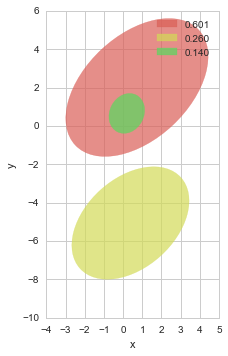

,R_square,K_S,Chi_square,MSE,RMSE / Max,RMSE / Mean
0,0.980,0.032,0.111,2.056246e-07,0.015,0.245


,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.535,0.740,2.326,3.806,3.470,0.485
2,0.319,0.489,-4.443,3.077,3.328,0.405
3,0.145,0.186,0.684,0.934,1.096,0.161


GMM Plot Result
0.535063678972 [[ 0.73960398  2.32606244]] [ 2.59686221  4.447113  ] -50.4052167029
0.319467334183 [[ 0.48937347 -4.4433501 ]] [ 2.4597099   3.80662176] 140.483698454
0.145468986845 [[ 0.18550027  0.68368458]] [ 0.89617781  1.12670233] 157.466007722


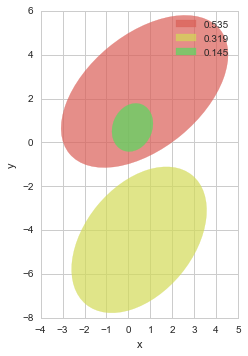

,R_square,K_S,Chi_square,MSE,RMSE / Max,RMSE / Mean
0,0.981,0.030,0.188,1.944765e-07,0.015,0.238


,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.588,0.813,2.112,3.734,3.564,0.447
2,0.265,0.419,-4.962,3.028,3.005,0.427
3,0.146,0.183,0.665,0.963,1.060,0.197


GMM Plot Result
0.5882309794 [[ 0.81293866  2.11184257]] [ 2.70971507  4.39324651] -47.978624523
0.265459677625 [[ 0.41908716 -4.96204416]] [ 2.28338754  3.60333122] -45.5084676944
0.146309342975 [[ 0.18258581  0.66477056]] [ 0.89579658  1.11813984] 148.018292572


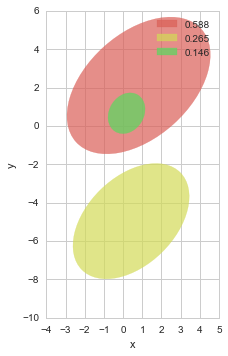

,R_square,K_S,Chi_square,MSE,RMSE / Max,RMSE / Mean
0,0.981,0.030,0.138,1.942960e-07,0.015,0.238


,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.551,0.784,2.267,3.766,3.368,0.467
2,0.298,0.509,-4.651,3.039,3.110,0.387
3,0.151,0.185,0.691,0.946,1.102,0.153


GMM Plot Result
0.550842827275 [[ 0.78413083  2.26694648]] [ 2.58228034  4.3420884 ] -51.74174741
0.297730681536 [[ 0.50851248 -4.65095935]] [ 2.40711623  3.62158747] 136.698808937
0.151426491189 [[ 0.18525448  0.69107964]] [ 0.9106207   1.13208628] 157.5100915


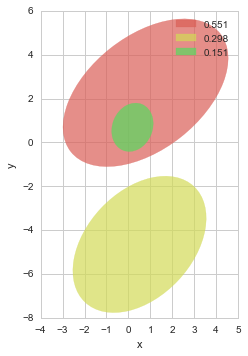

,R_square,K_S,Chi_square,MSE,RMSE / Max,RMSE / Mean
0,0.981,0.032,0.203,2.052537e-07,0.015,0.245


In [66]:
for i in range(10):
    df_resampled = df.sample(frac=1, replace=True)
    result = fit_gmm(df_resampled, number_of_gaussian=NUMBER_OF_GAUSSIAN, fit_method=FIT_METHOD)
    display(pretty_print_gmm(result['gmm']))
    plot_gmm_ellipses(result['gmm'])
    display(gof_df(result['gmm_pdf_result'], result['kde_result']))

## 6.2 Cross-validation, to select the number of Gaussian

In [67]:
## 5-fold cross validation
gaussian_number_range = arange(1,7)
CV_result_train_all,CV_result_test_all =[],[]
number_of_fold = 4
print 'Number of train/test dataset', len(df)*(number_of_fold-1)/number_of_fold, len(df)/number_of_fold

for number_of_gaussian in gaussian_number_range:
    print '  '
    print 'Number of gaussian', number_of_gaussian
    
    kf = KFold(len(df), n_folds=number_of_fold, shuffle=True) 

    CV_result_train, CV_result_test = [],[]
    for train_index, test_index in kf:
        sub_df, sub_df_test = df.iloc[train_index], df.iloc[test_index]

        # 1. Train
        result = fit_gmm(sub_df, fit_method = FIT_METHOD, number_of_gaussian=number_of_gaussian)
        gmm_pdf_result_train = result['gmm_pdf_result']
        kde_result_train = result['kde_result']

        # 2. Validate
        # GMM from Train - KDE from Test
        sample = array(zip(sub_df_test.x, sub_df_test.y))
        kde_test = neighbors.KernelDensity(bandwidth=bandwidth).fit(sample) 
        kde_result_test = exp(kde_test.score_samples(points))

        gof_train = goodness_of_fit_summary(gmm_pdf_result_train, 
                                            kde_result_train,)
        gof_test =  goodness_of_fit_summary(gmm_pdf_result_train, 
                                            kde_result_test,)
                
        CV_result_train.append(gof_train)
        CV_result_test.append(gof_test)
        
    CV_result_train_all.append(CV_result_train)
    CV_result_test_all.append(CV_result_test)
    
    print 'Train'
    pretty_pd_display(CV_result_train)
    print 'Test'
    pretty_pd_display(CV_result_test)

Number of train/test dataset 25889.25 8629.75
  
Number of gaussian 1
Train


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.259940,0.061910,0.000003,0.054127,0.877249,0.749900
1,0.257501,0.063201,0.000003,0.054283,0.882489,0.747578
2,0.247859,0.063379,0.000003,0.054408,0.875624,0.749940
3,0.243813,0.064945,0.000003,0.055253,0.897651,0.739472


Test


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.248744,0.059545,0.000003,0.055513,0.898345,0.739240
1,0.247472,0.062352,0.000003,0.055174,0.884561,0.745241
2,0.285070,0.064920,0.000003,0.054568,0.901664,0.740138
3,0.310837,0.066618,0.000003,0.053735,0.863322,0.755749


  
Number of gaussian 2
Train


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.152871,0.029762,2.736742e-07,0.017463,0.282415,0.973700
1,0.144925,0.029747,2.938862e-07,0.018011,0.292761,0.972282
2,0.137748,0.028154,2.809591e-07,0.017547,0.286046,0.973638
3,0.153637,0.030603,2.992005e-07,0.018375,0.295394,0.971797


Test


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.145714,0.032263,3.907151e-07,0.020723,0.337557,0.964814
1,0.178536,0.025281,2.865389e-07,0.018002,0.288769,0.972661
2,0.197201,0.030586,3.284872e-07,0.019489,0.309845,0.968161
3,0.145109,0.035722,3.098525e-07,0.018116,0.300294,0.970471


  
Number of gaussian 3
Train


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.155018,0.028542,1.938848e-07,0.014688,0.237653,0.981686
1,0.171279,0.031436,1.874823e-07,0.014463,0.233822,0.982144
2,0.165216,0.032586,1.950785e-07,0.014658,0.238526,0.981620
3,0.142959,0.030706,1.964144e-07,0.014781,0.239225,0.981420


Test


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.234239,0.033098,2.224957e-07,0.015671,0.254904,0.978876
1,0.152368,0.032450,2.434741e-07,0.016330,0.266218,0.977442
2,0.260432,0.030936,2.213372e-07,0.015874,0.253783,0.978831
3,0.146063,0.027138,2.098614e-07,0.015230,0.247476,0.980158


  
Number of gaussian 4
Train


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.040841,0.007827,6.139235e-08,0.008285,0.133720,0.994175
1,0.040938,0.009124,6.618359e-08,0.008534,0.138926,0.993747
2,0.032762,0.010309,5.640594e-08,0.007876,0.128228,0.994692
3,0.040492,0.009000,5.891138e-08,0.008137,0.131057,0.994400


Test


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.043027,0.011484,8.915996e-08,0.009850,0.161396,0.991645
1,0.051161,0.007773,7.356875e-08,0.009163,0.146337,0.993019
2,0.069427,0.014567,1.003418e-07,0.010712,0.171004,0.990359
3,0.046320,0.009459,9.639576e-08,0.010165,0.167562,0.991018


  
Number of gaussian 5
Train


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.077882,0.006586,4.840835e-08,0.007350,0.118819,0.995372
1,0.037595,0.007978,4.132088e-08,0.006714,0.109736,0.996144
2,0.054572,0.007724,4.857900e-08,0.007450,0.118980,0.995344
3,0.036712,0.009106,4.948218e-08,0.007356,0.120093,0.995360


Test


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.039888,0.010100,7.645132e-08,0.009147,0.149157,0.992991
1,0.080514,0.012919,1.200780e-07,0.011866,0.187142,0.988187
2,0.176515,0.014410,8.655384e-08,0.009404,0.158901,0.992132
3,0.036438,0.010688,6.929387e-08,0.008979,0.142135,0.993271


  
Number of gaussian 6
Train


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.014591,0.004263,2.583017e-08,0.005387,0.086768,0.997532
1,0.020496,0.003954,2.402761e-08,0.005120,0.083701,0.997763
2,0.093986,0.007979,3.651690e-08,0.006346,0.103185,0.996549
3,0.017487,0.003277,2.339190e-08,0.005131,0.082552,0.997769


Test


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.032077,0.008974,5.467517e-08,0.007661,0.126252,0.994984
1,0.021477,0.010872,6.622384e-08,0.008810,0.138872,0.993428
2,0.067840,0.008523,6.428671e-08,0.008538,0.136832,0.993903
3,0.033585,0.007644,5.973279e-08,0.007987,0.132056,0.994489


In [68]:
train_scores_mean, train_scores_std = generate_mean_std_gof(CV_result_train_all)
print 'Train gof mean, std'
display(train_scores_mean)

test_scores_mean, test_scores_std = generate_mean_std_gof(CV_result_test_all)
print 'Test gof mean, std'
display(test_scores_mean)

Train gof mean, std


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.252278,0.063359,2.676635e-06,0.054518,0.883253,0.746723
1,0.147296,0.029567,2.869300e-07,0.017849,0.289154,0.972854
2,0.158618,0.030818,1.932150e-07,0.014647,0.237307,0.981717
3,0.038758,0.009065,6.072332e-08,0.008208,0.132983,0.994254
4,0.051690,0.007849,4.694760e-08,0.007218,0.116907,0.995555
5,0.036640,0.004868,2.744164e-08,0.005496,0.089051,0.997403


Test gof mean, std


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.273030,0.063359,2.699531e-06,0.054747,0.886973,0.745092
1,0.166640,0.030963,3.288984e-07,0.019083,0.309116,0.969027
2,0.198275,0.030905,2.242921e-07,0.015776,0.255595,0.978827
3,0.052484,0.010821,8.986657e-08,0.009972,0.161575,0.991511
4,0.083339,0.012029,8.809425e-08,0.009849,0.159334,0.991645
5,0.038745,0.009003,6.122963e-08,0.008249,0.133503,0.994201


R_square


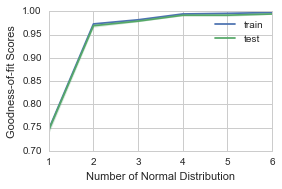

K_S


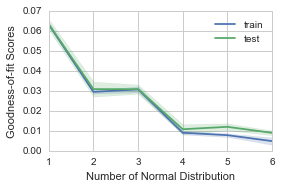

Chi_square


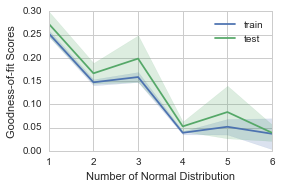

In [69]:
prop_cycle=mpl.rcParams['axes.color_cycle']
for column in ['R_square','K_S','Chi_square', ]:
    plot(gaussian_number_range, train_scores_mean[column],
             '-', label = 'train', color=prop_cycle[0])
    plt.fill_between(gaussian_number_range, 
                     train_scores_mean[column] - train_scores_std[column],
                     train_scores_mean[column] + train_scores_std[column], 
                     alpha=0.2, color=prop_cycle[0])
    
    plot(gaussian_number_range, test_scores_mean[column],
             '-', label = 'test',color=prop_cycle[1])
    plt.fill_between(gaussian_number_range, 
                 test_scores_mean[column] - test_scores_std[column],
                 test_scores_mean[column] + test_scores_std[column], 
                 alpha=0.2,color=prop_cycle[1])
    plt.xticks(gaussian_number_range)
    print column
    plt_configure(xlabel='Number of Normal Distribution', ylabel='Goodness-of-fit Scores', 
                  figsize=(4,2.5), legend={'loc':'best'})
    plt.show()

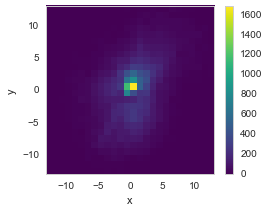

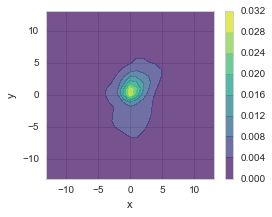

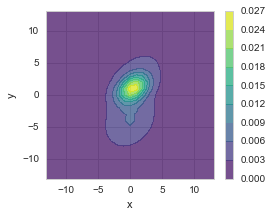

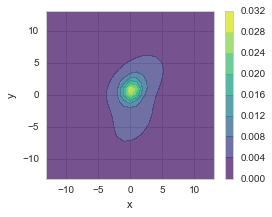

In [70]:
for fig in [fig_hist, fig_kde, fig_em, fig_gmm]:
    display(fig)

In [71]:
import time
save_notebook()
time.sleep(3)
location_name = get_location_name(ipath)
current_file = 'GMM.ipynb'
output_file = './output_HTML/'+location_name+'.html' 
output_HTML(current_file, output_file)